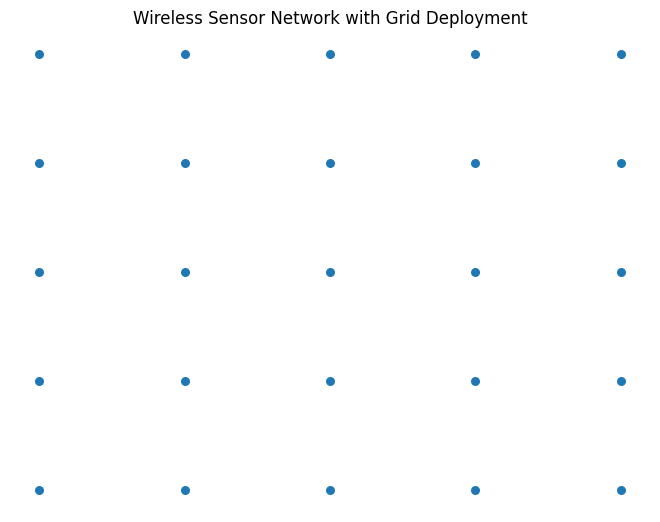

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Define Simulation Parameters
num_rows = 5  # Number of rows in the grid
num_columns = 5 # Number of columns in the grid
communication_range = 30 #ommunication range of sensor nodes (in meters)

# Create a Sensor Network with Grid Deployment
G = nx.Graph()

# Calculate the spacing for the grid deployment
field_width = num_columns * 2 * communication_range
field_length = num_rows * 2 * communication_range

spacing_x = field_width / num_columns
spacing_y = field_length / num_rows

# Add sensor nodes in a grid pattern
node_id = 0
for row in range(num_rows):
    for col in range(num_columns):
        x = col * spacing_x + spacing_x / 2
        y = row * spacing_y + spacing_y / 2
        G.add_node(node_id, pos=(x, y))
        node_id += 1

# Connect nodes within communication range
for u in G.nodes():
    for v in G.nodes():
        if u != v:
            pos_u = G.nodes[u]['pos']
            pos_v = G.nodes[v]['pos']
            distance = ((pos_u[0] - pos_v[0]) ** 2 + (pos_u[1] - pos_v[1]) ** 2) ** 0.5
            if distance <= communication_range:
                G.add_edge(u, v)

# Visualize the Sensor Network
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, node_size=30)
plt.title('Wireless Sensor Network with Grid Deployment')
plt.show()


In [2]:
# Add a Sink Node
sink_id = node_id  # Assign a new ID for the sink node
sink_x = field_width / 2
sink_y = field_length / 2
G.add_node(sink_id, pos=(sink_x, sink_y))

# Connect nodes within communication range
for u in G.nodes():
    for v in G.nodes():
        if u != v:
            pos_u = G.nodes[u]['pos']
            pos_v = G.nodes[v]['pos']
            distance = ((pos_u[0] - pos_v[0]) ** 2 + (pos_u[1] - pos_v[1]) ** 2) ** 0.5
            if distance <= communication_range:
                G.add_edge(u, v)


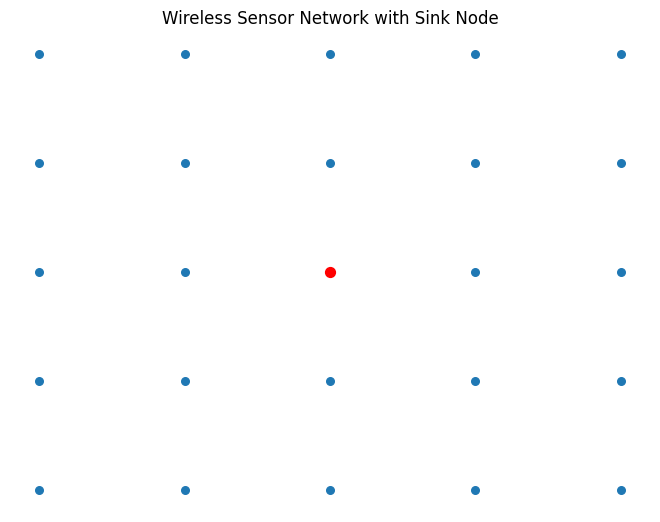

In [3]:
# Visualize the Sensor Network with the Sink Node
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, node_size=30)
nx.draw_networkx_nodes(G, pos, nodelist=[sink_id], node_color='red', node_size=50)  # Highlight the sink node
plt.title('Wireless Sensor Network with Sink Node')
plt.show()

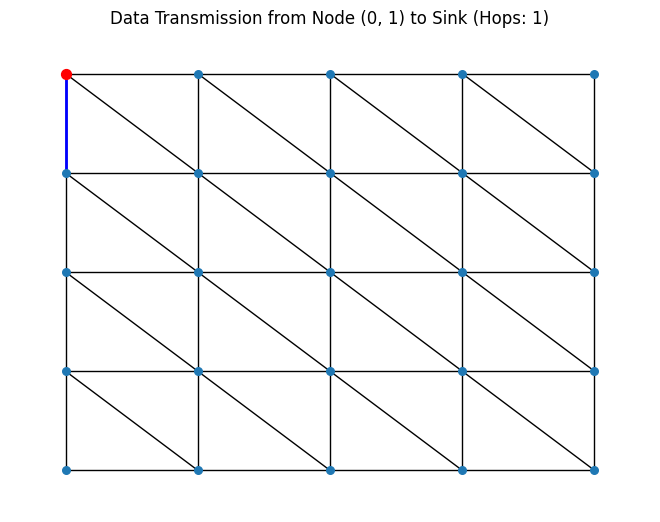

Data Transmission Path from Node (0, 1) to Sink: [(0, 1), (0, 0)]
Total Hops: 1


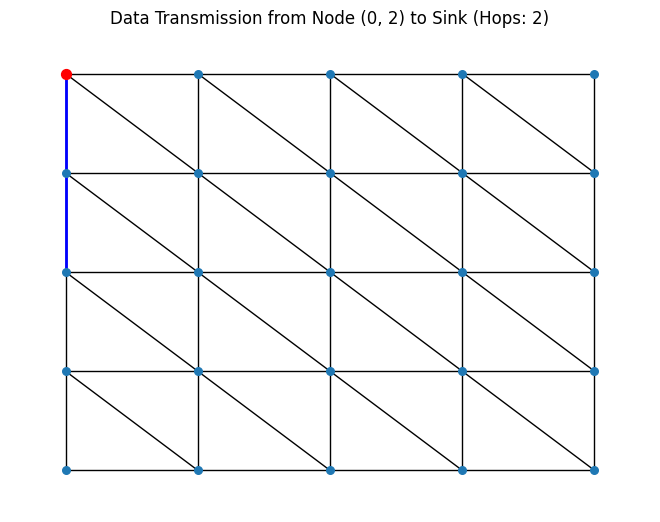

Data Transmission Path from Node (0, 2) to Sink: [(0, 2), (0, 1), (0, 0)]
Total Hops: 2


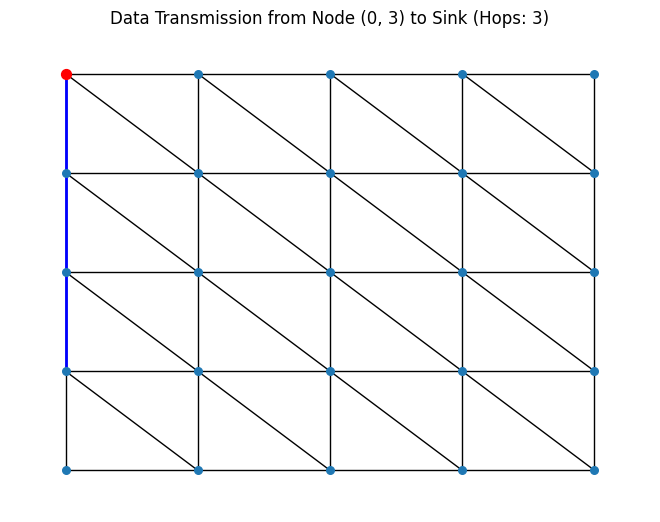

Data Transmission Path from Node (0, 3) to Sink: [(0, 3), (0, 2), (0, 1), (0, 0)]
Total Hops: 3


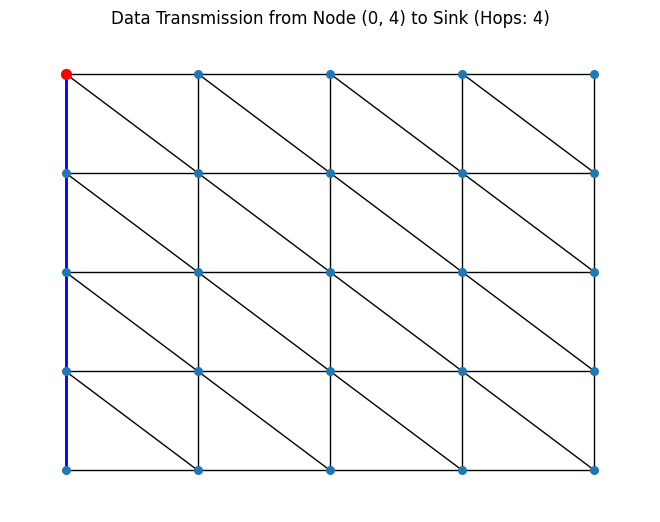

Data Transmission Path from Node (0, 4) to Sink: [(0, 4), (0, 3), (0, 2), (0, 1), (0, 0)]
Total Hops: 4


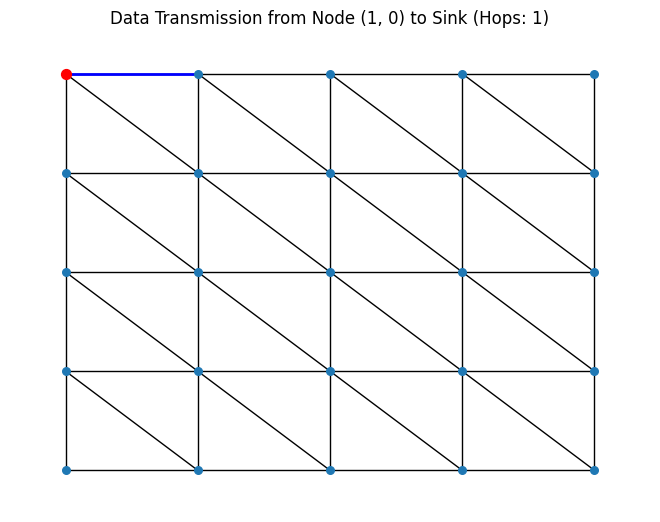

Data Transmission Path from Node (1, 0) to Sink: [(1, 0), (0, 0)]
Total Hops: 1


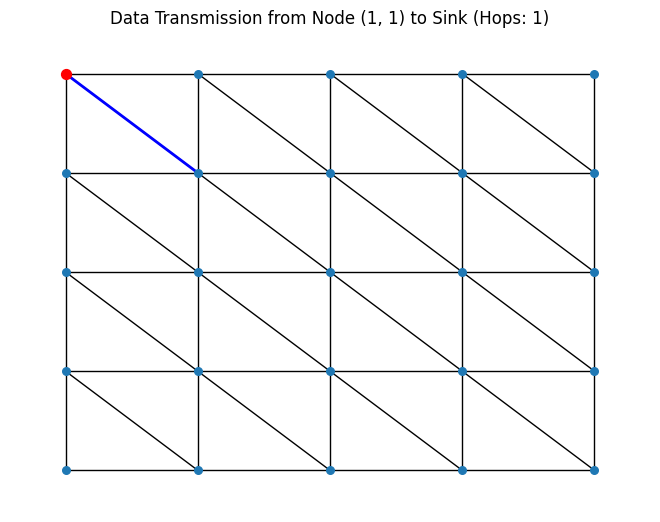

Data Transmission Path from Node (1, 1) to Sink: [(1, 1), (0, 0)]
Total Hops: 1


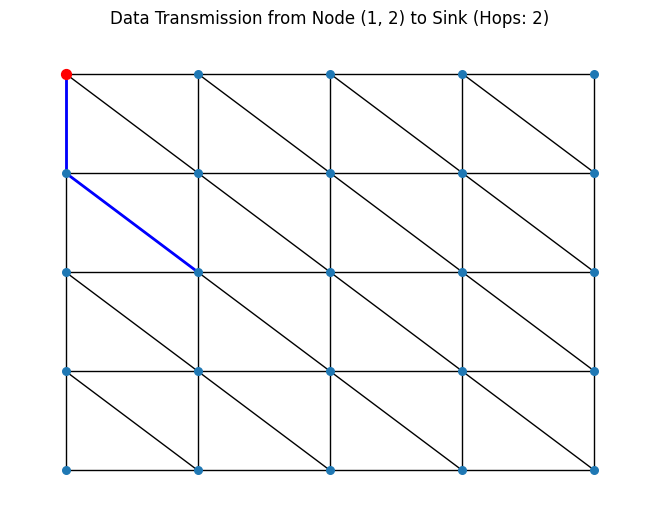

Data Transmission Path from Node (1, 2) to Sink: [(1, 2), (0, 1), (0, 0)]
Total Hops: 2


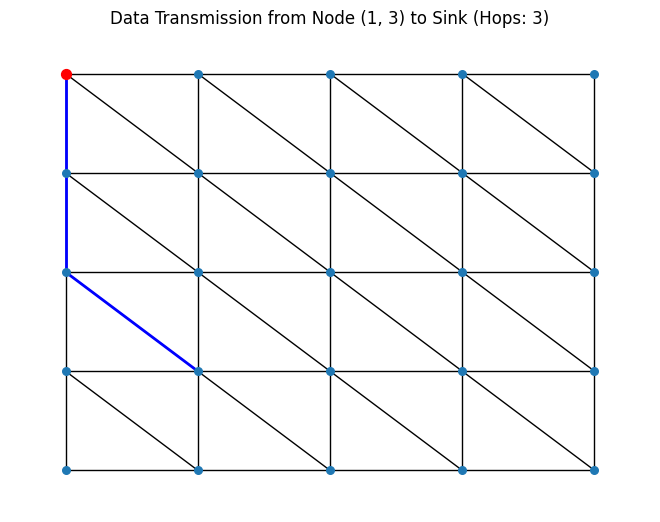

Data Transmission Path from Node (1, 3) to Sink: [(1, 3), (0, 2), (0, 1), (0, 0)]
Total Hops: 3


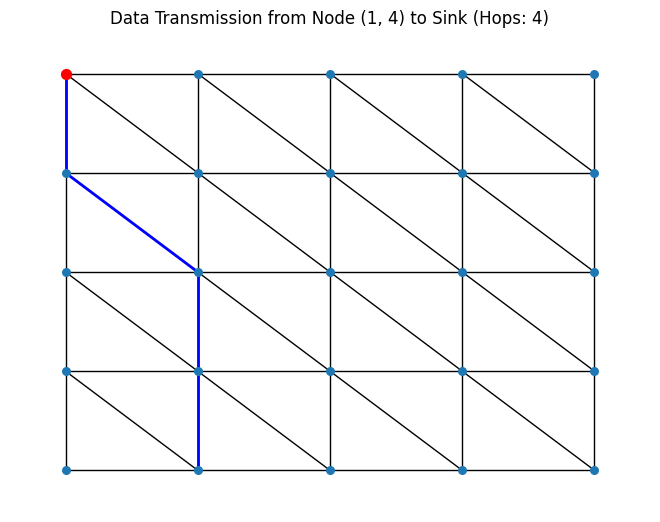

Data Transmission Path from Node (1, 4) to Sink: [(1, 4), (1, 3), (1, 2), (0, 1), (0, 0)]
Total Hops: 4


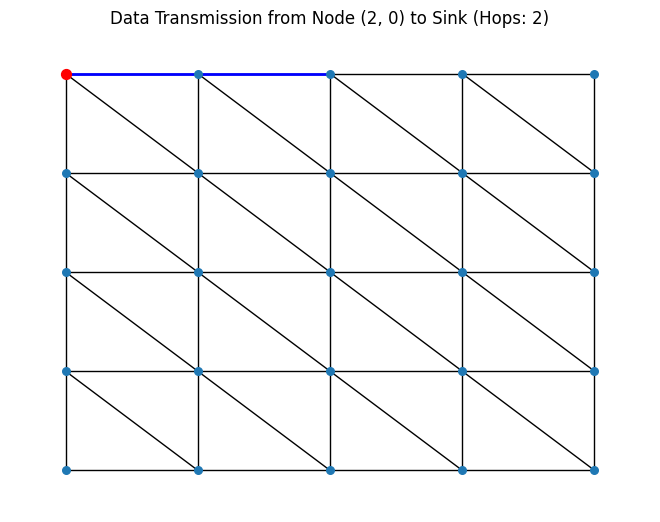

Data Transmission Path from Node (2, 0) to Sink: [(2, 0), (1, 0), (0, 0)]
Total Hops: 2


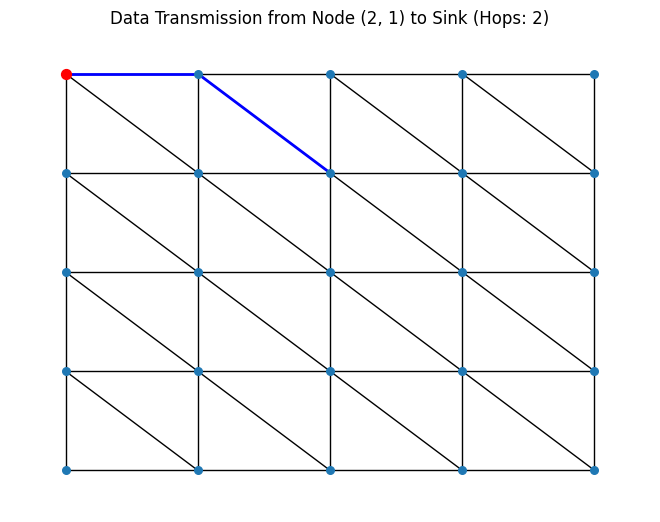

Data Transmission Path from Node (2, 1) to Sink: [(2, 1), (1, 0), (0, 0)]
Total Hops: 2


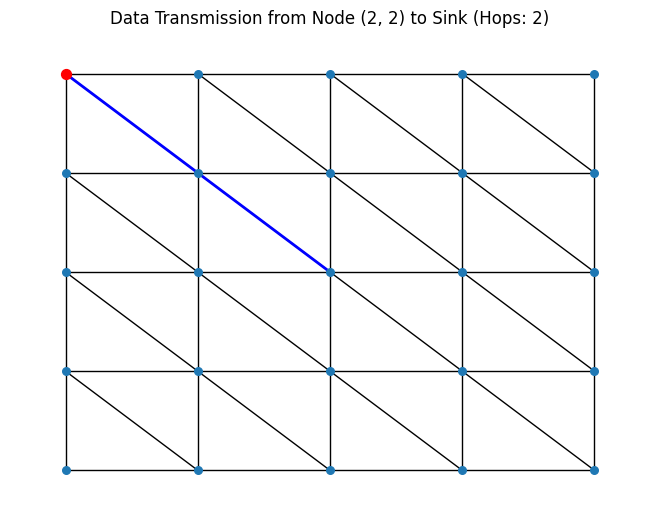

Data Transmission Path from Node (2, 2) to Sink: [(2, 2), (1, 1), (0, 0)]
Total Hops: 2


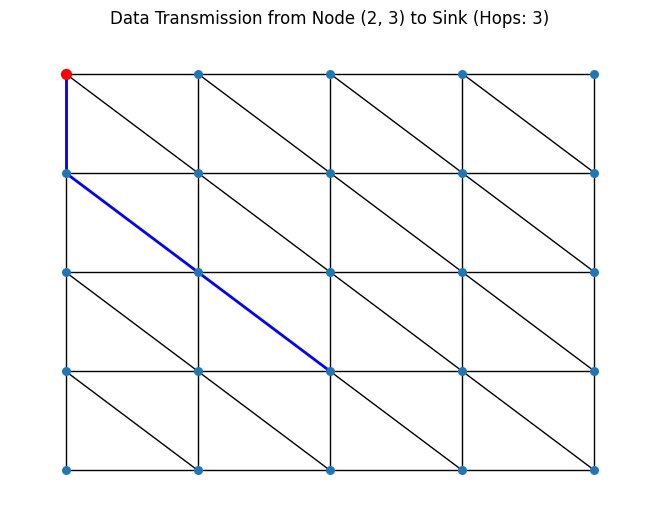

Data Transmission Path from Node (2, 3) to Sink: [(2, 3), (1, 2), (0, 1), (0, 0)]
Total Hops: 3


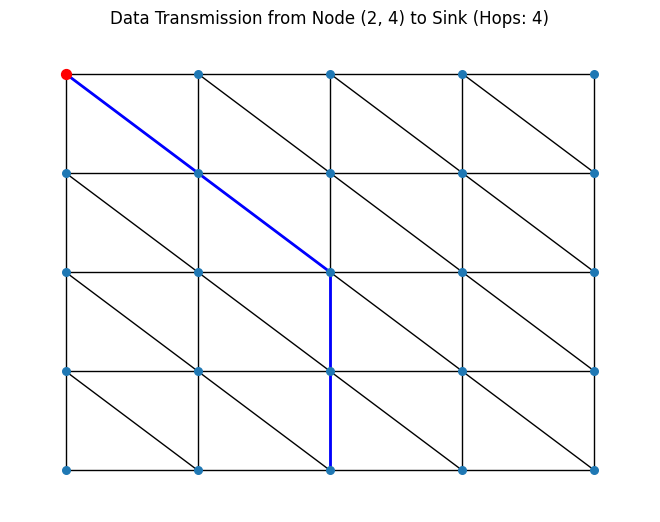

Data Transmission Path from Node (2, 4) to Sink: [(2, 4), (2, 3), (2, 2), (1, 1), (0, 0)]
Total Hops: 4


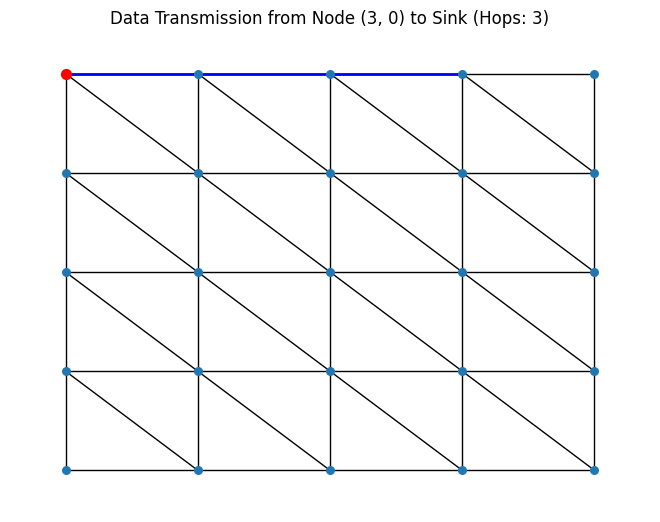

Data Transmission Path from Node (3, 0) to Sink: [(3, 0), (2, 0), (1, 0), (0, 0)]
Total Hops: 3


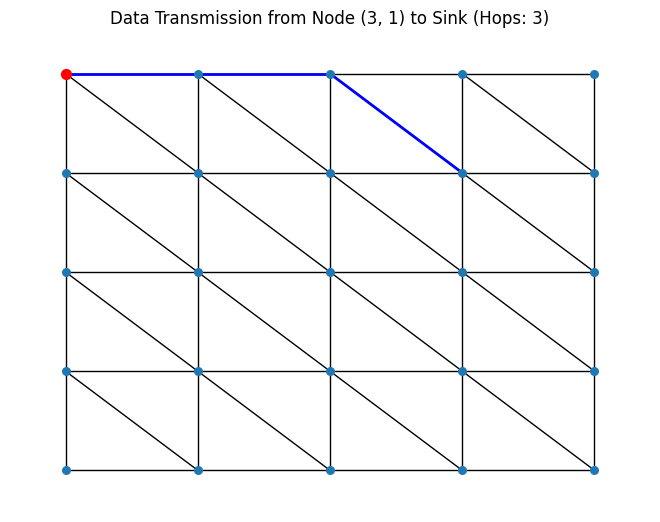

Data Transmission Path from Node (3, 1) to Sink: [(3, 1), (2, 0), (1, 0), (0, 0)]
Total Hops: 3


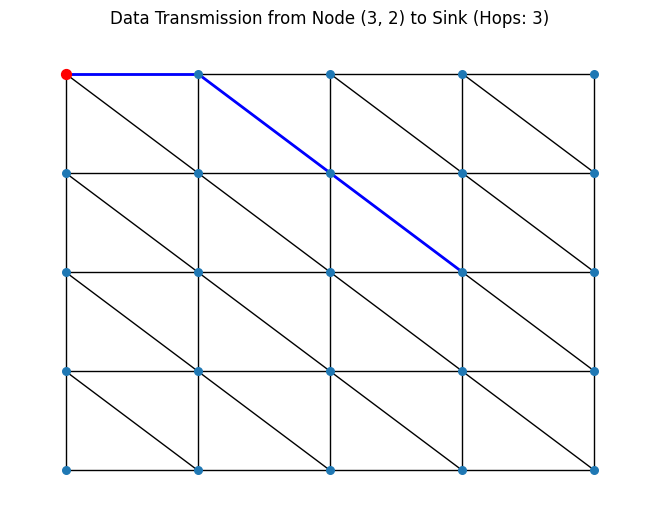

Data Transmission Path from Node (3, 2) to Sink: [(3, 2), (2, 1), (1, 0), (0, 0)]
Total Hops: 3


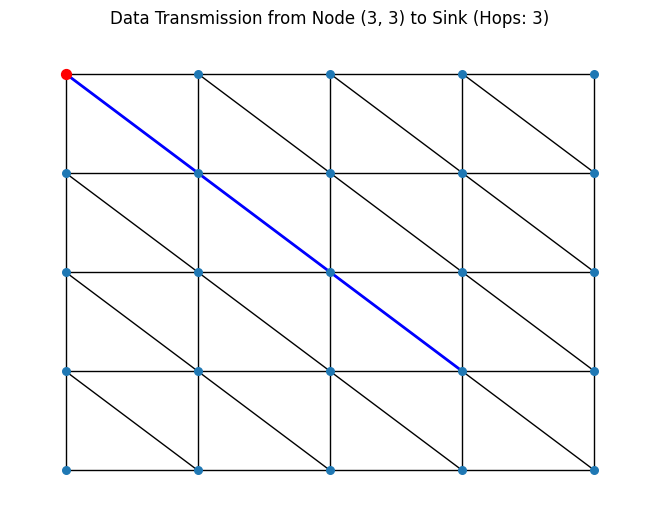

Data Transmission Path from Node (3, 3) to Sink: [(3, 3), (2, 2), (1, 1), (0, 0)]
Total Hops: 3


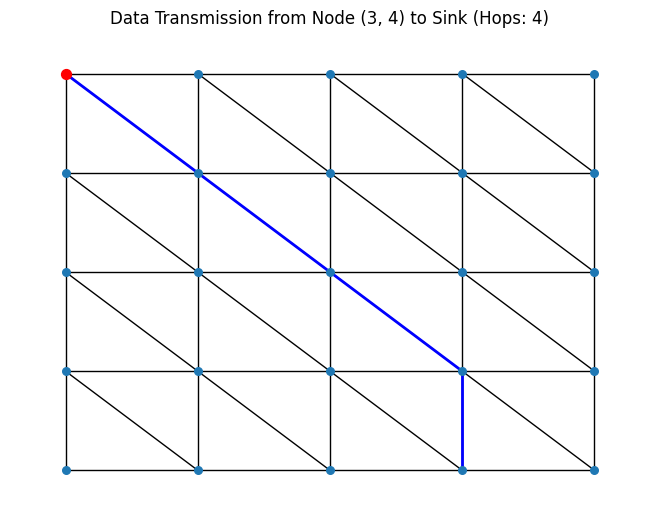

Data Transmission Path from Node (3, 4) to Sink: [(3, 4), (3, 3), (2, 2), (1, 1), (0, 0)]
Total Hops: 4


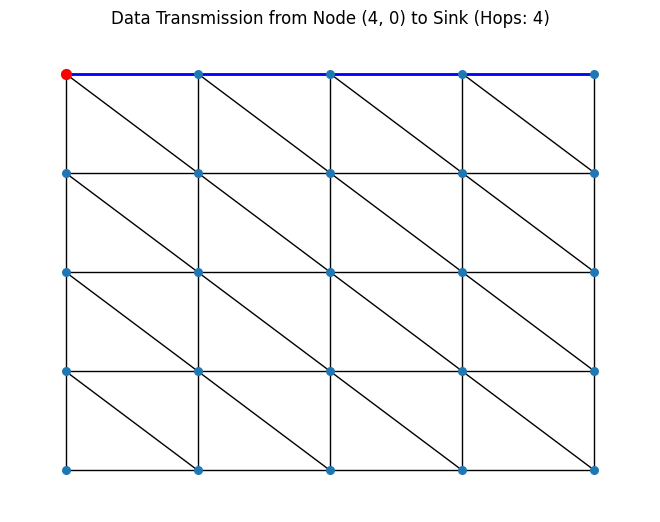

Data Transmission Path from Node (4, 0) to Sink: [(4, 0), (3, 0), (2, 0), (1, 0), (0, 0)]
Total Hops: 4


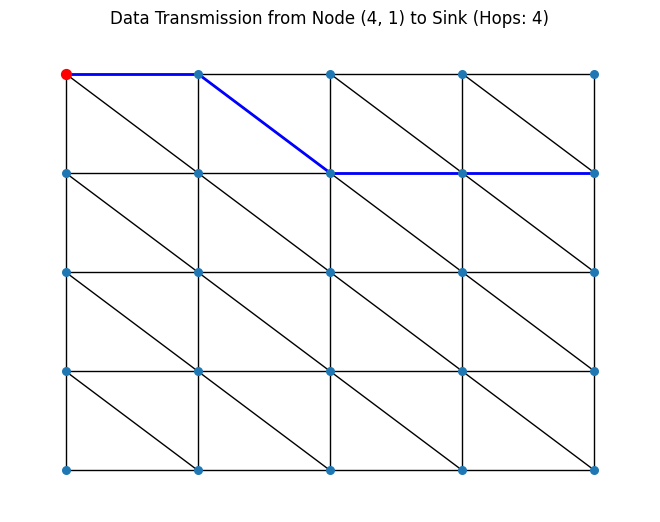

Data Transmission Path from Node (4, 1) to Sink: [(4, 1), (3, 1), (2, 1), (1, 0), (0, 0)]
Total Hops: 4


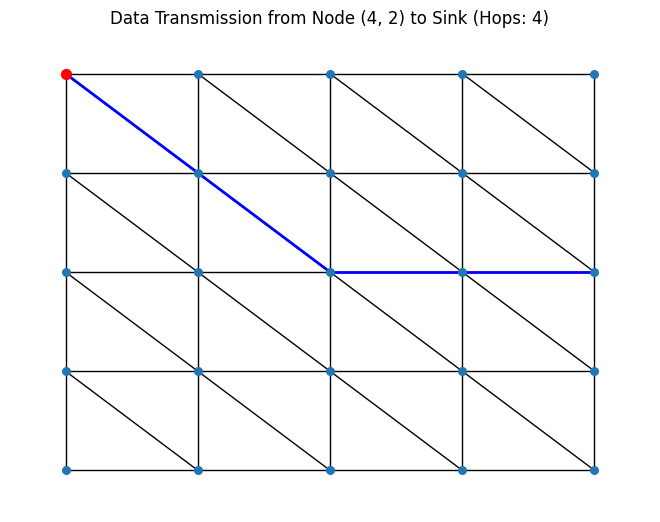

Data Transmission Path from Node (4, 2) to Sink: [(4, 2), (3, 2), (2, 2), (1, 1), (0, 0)]
Total Hops: 4


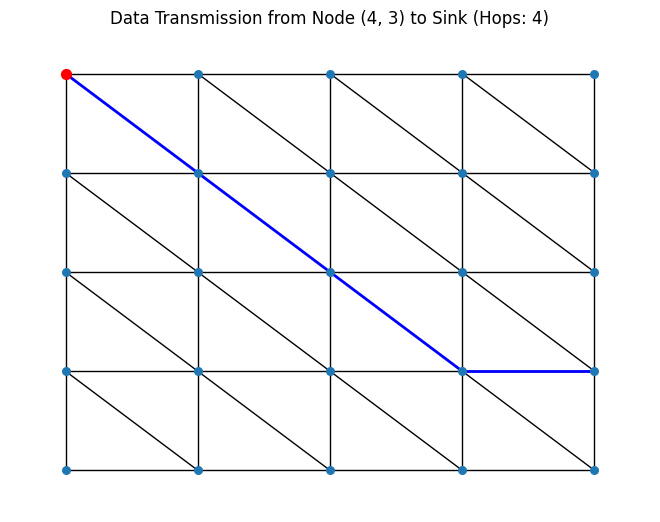

Data Transmission Path from Node (4, 3) to Sink: [(4, 3), (3, 3), (2, 2), (1, 1), (0, 0)]
Total Hops: 4


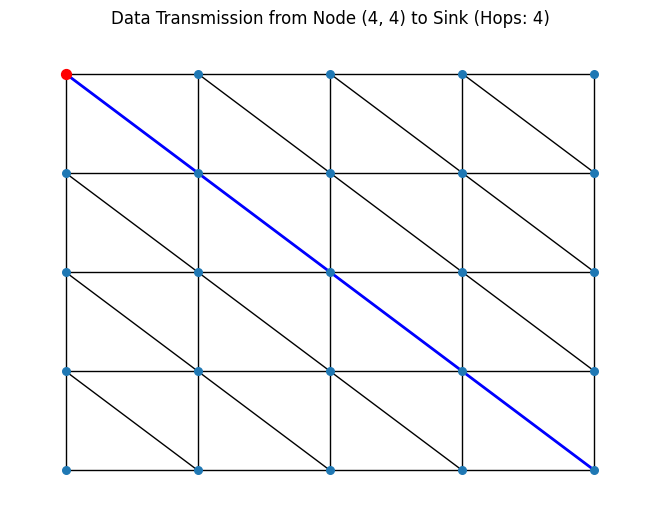

Data Transmission Path from Node (4, 4) to Sink: [(4, 4), (3, 3), (2, 2), (1, 1), (0, 0)]
Total Hops: 4


In [4]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Create a grid-based graph with diagonal connections (adjust the grid size as needed)
G = nx.grid_2d_graph(5, 5)
G.add_edges_from(((n, (n[0] + 1, n[1] + 1)) for n in G.nodes if (n[0] + 1, n[1] + 1) in G.nodes))

# Define the sink node coordinates
sink_coordinates = [(0, 0)]  # Coordinates of the sink node
sink_id = sink_coordinates[0]

# Assign positions to nodes in the grid
pos = {(x, y): (x, -y) for x, y in G.nodes()}

# Select a random source node that is not a sink
available_nodes = list(G.nodes())
available_nodes.remove(sink_id)  # Ensure the source is not the sink

# Visualize paths from all possible source nodes to the sink
for source_node in available_nodes:
    # Calculate the shortest path from the source node to the sink
    shortest_path = nx.shortest_path(G, source=source_node, target=sink_id)

    # Highlight the path from the source node to the sink node
    path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]

    # Visualize the Sensor Network with the Sink Node and Data Transmission Path
    plt.figure()
    nx.draw(G, pos, node_size=30)
    nx.draw_networkx_nodes(G, pos, nodelist=[sink_id], node_color='red', node_size=50)  # Highlight the sink node
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=2)  # Highlight the data transmission path
    plt.title(f'Data Transmission from Node {source_node} to Sink (Hops: {len(shortest_path) - 1})')
    plt.show()

    # Print the path from the source node to the sink node
    print(f"Data Transmission Path from Node {source_node} to Sink: {shortest_path}")
    print(f"Total Hops: {len(shortest_path) - 1}")


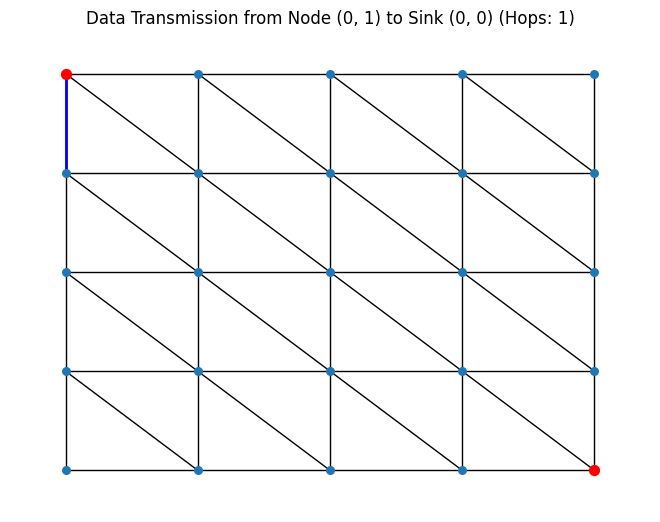

Data Transmission Path from Node (0, 1) to Sink (0, 0): [(0, 1), (0, 0)]
Total Hops: 1


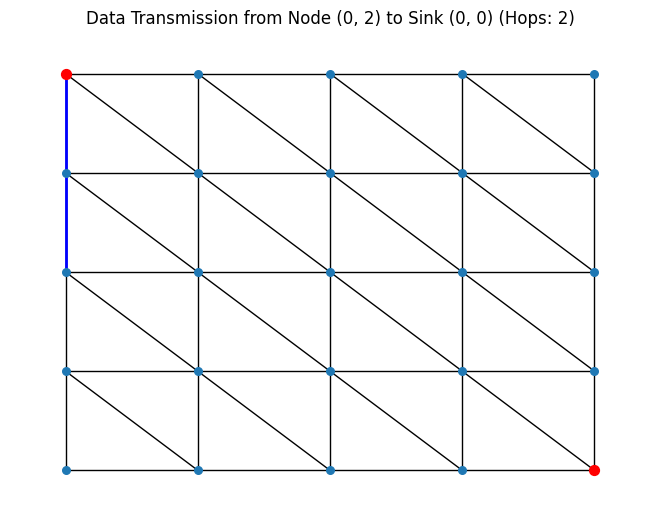

Data Transmission Path from Node (0, 2) to Sink (0, 0): [(0, 2), (0, 1), (0, 0)]
Total Hops: 2


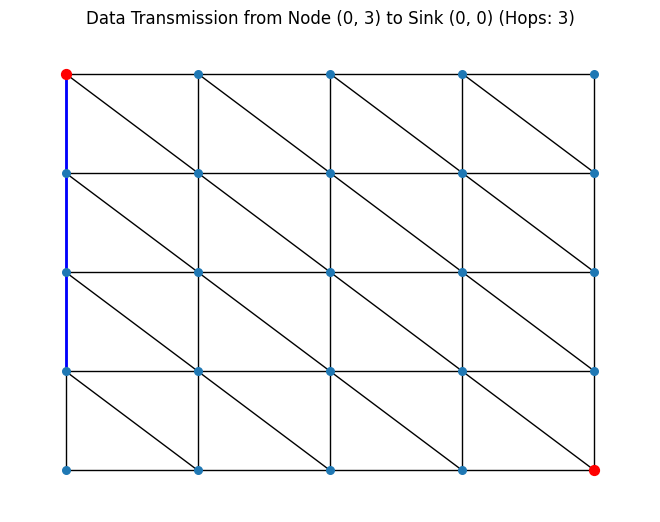

Data Transmission Path from Node (0, 3) to Sink (0, 0): [(0, 3), (0, 2), (0, 1), (0, 0)]
Total Hops: 3


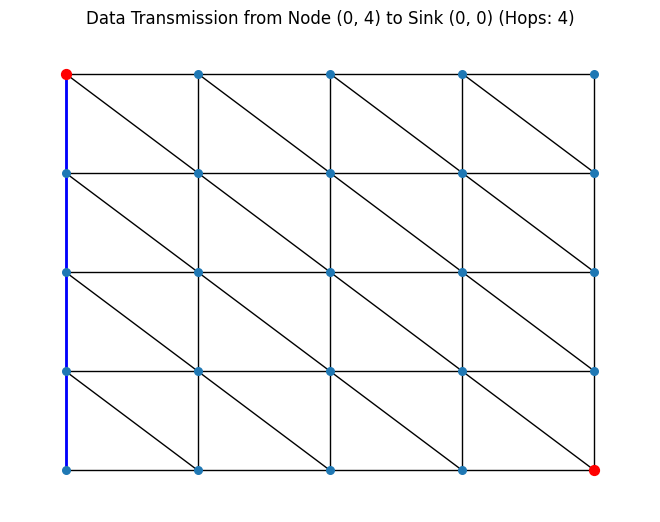

Data Transmission Path from Node (0, 4) to Sink (0, 0): [(0, 4), (0, 3), (0, 2), (0, 1), (0, 0)]
Total Hops: 4


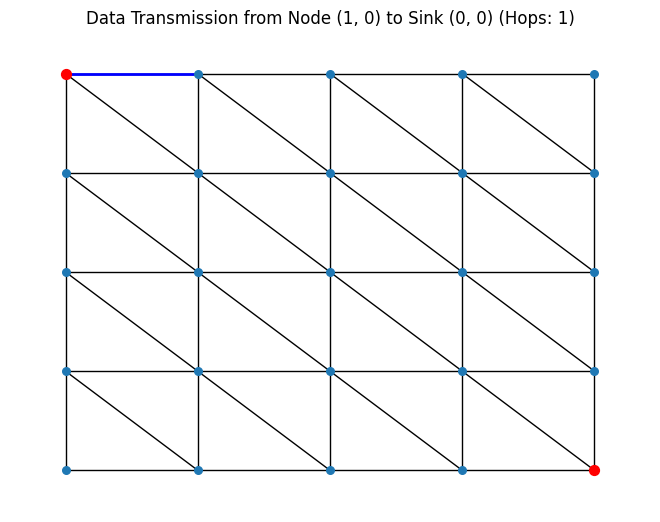

Data Transmission Path from Node (1, 0) to Sink (0, 0): [(1, 0), (0, 0)]
Total Hops: 1


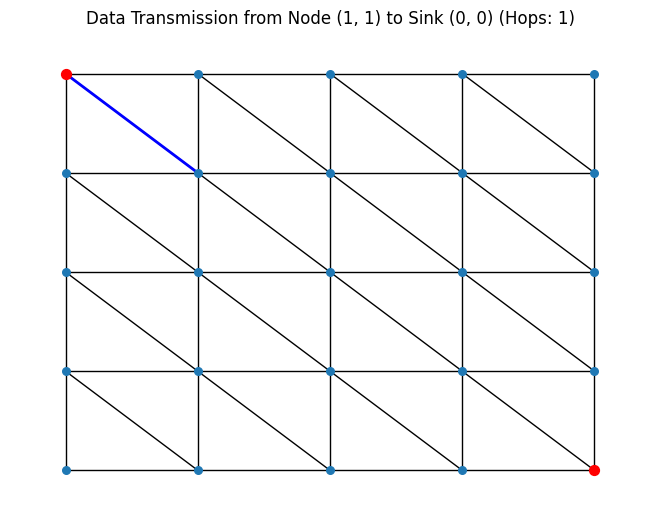

Data Transmission Path from Node (1, 1) to Sink (0, 0): [(1, 1), (0, 0)]
Total Hops: 1


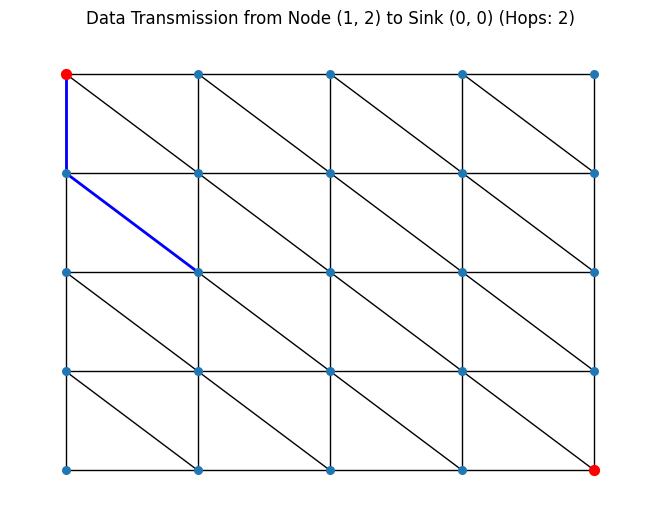

Data Transmission Path from Node (1, 2) to Sink (0, 0): [(1, 2), (0, 1), (0, 0)]
Total Hops: 2


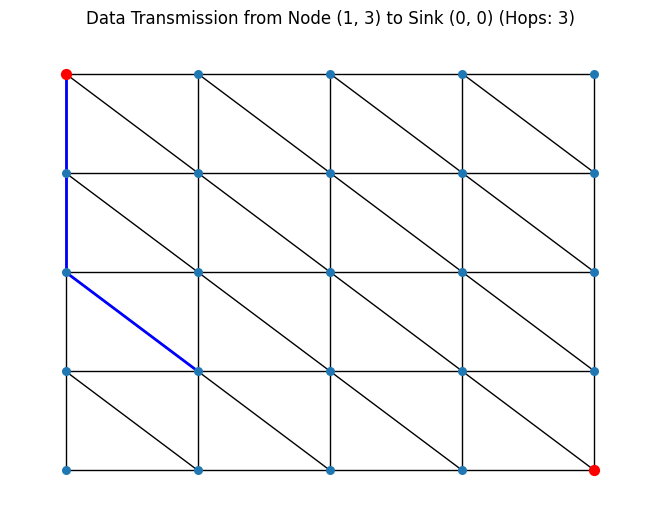

Data Transmission Path from Node (1, 3) to Sink (0, 0): [(1, 3), (0, 2), (0, 1), (0, 0)]
Total Hops: 3


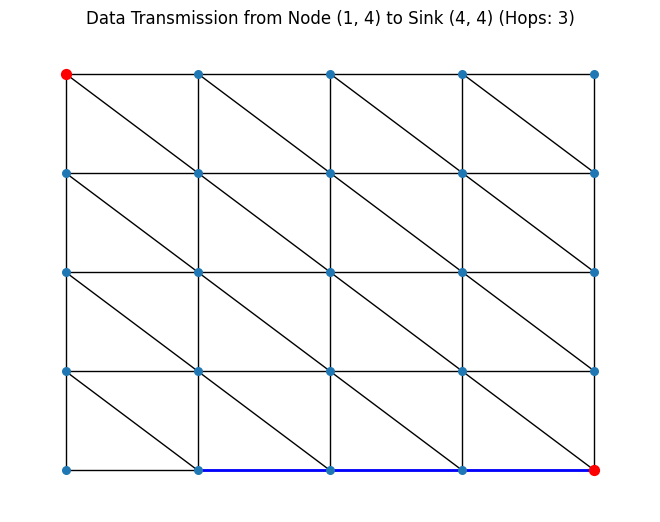

Data Transmission Path from Node (1, 4) to Sink (4, 4): [(1, 4), (2, 4), (3, 4), (4, 4)]
Total Hops: 3


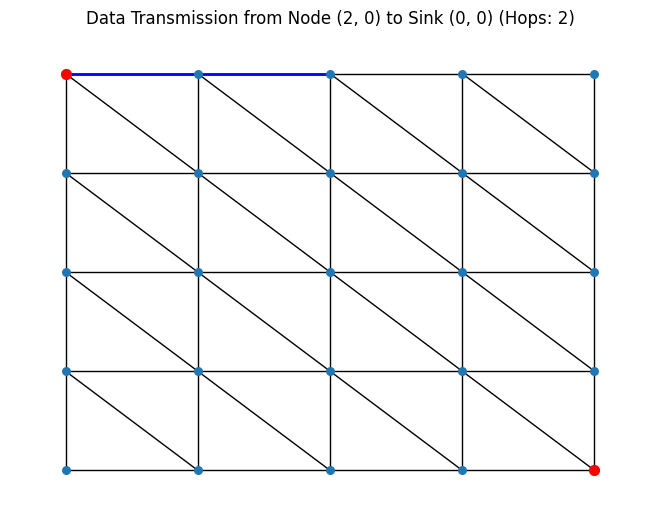

Data Transmission Path from Node (2, 0) to Sink (0, 0): [(2, 0), (1, 0), (0, 0)]
Total Hops: 2


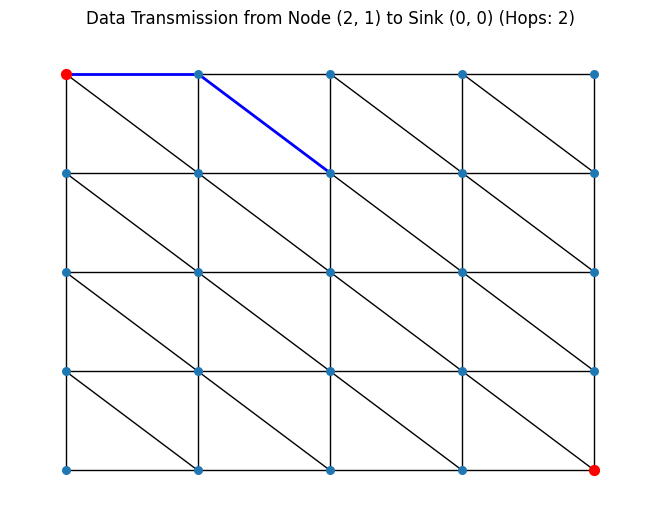

Data Transmission Path from Node (2, 1) to Sink (0, 0): [(2, 1), (1, 0), (0, 0)]
Total Hops: 2


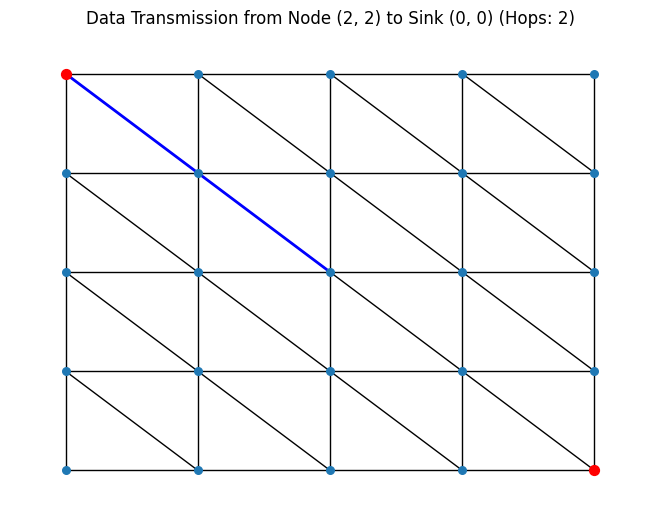

Data Transmission Path from Node (2, 2) to Sink (0, 0): [(2, 2), (1, 1), (0, 0)]
Total Hops: 2


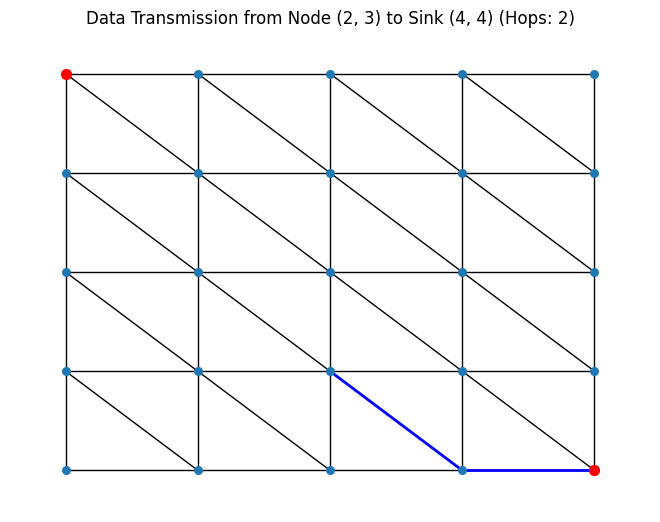

Data Transmission Path from Node (2, 3) to Sink (4, 4): [(2, 3), (3, 4), (4, 4)]
Total Hops: 2


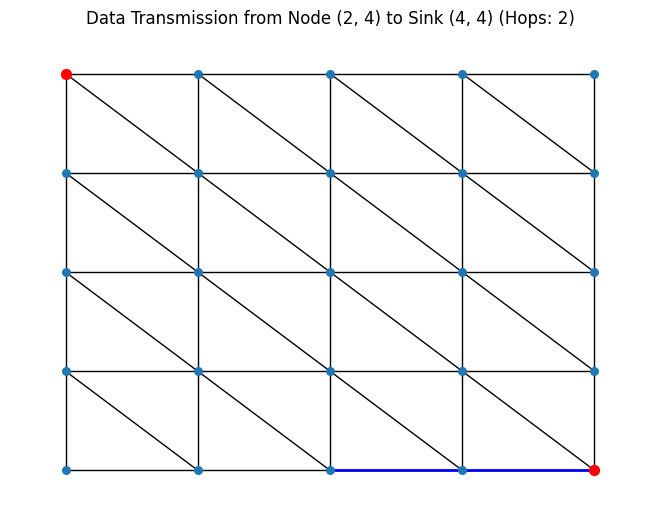

Data Transmission Path from Node (2, 4) to Sink (4, 4): [(2, 4), (3, 4), (4, 4)]
Total Hops: 2


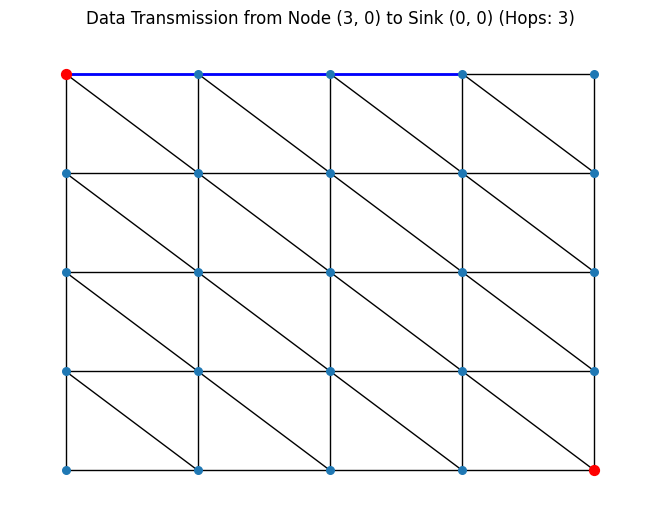

Data Transmission Path from Node (3, 0) to Sink (0, 0): [(3, 0), (2, 0), (1, 0), (0, 0)]
Total Hops: 3


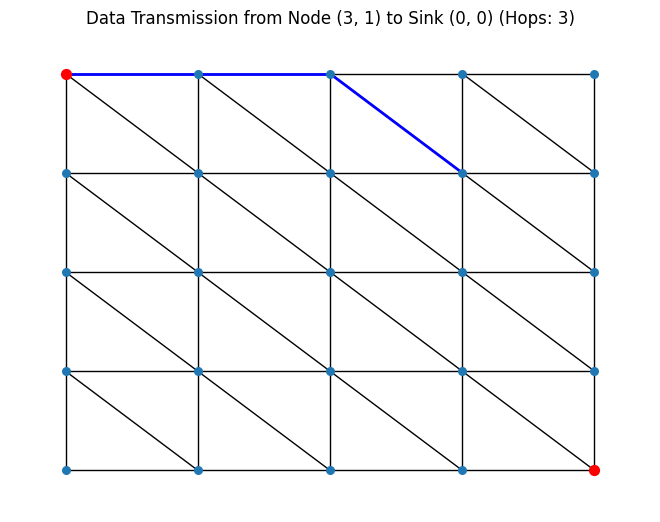

Data Transmission Path from Node (3, 1) to Sink (0, 0): [(3, 1), (2, 0), (1, 0), (0, 0)]
Total Hops: 3


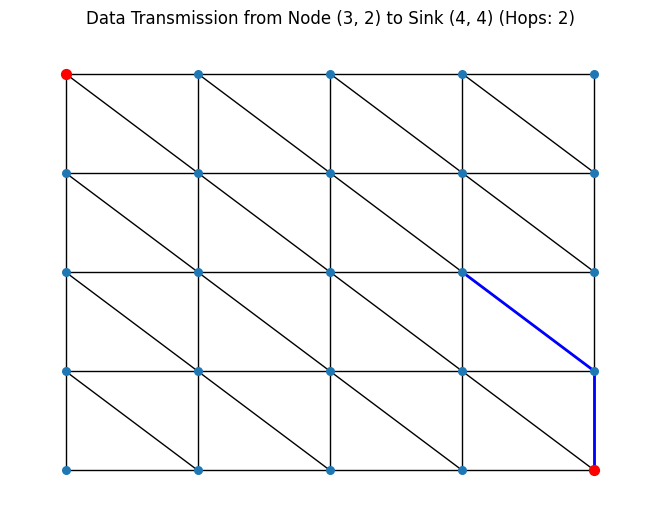

Data Transmission Path from Node (3, 2) to Sink (4, 4): [(3, 2), (4, 3), (4, 4)]
Total Hops: 2


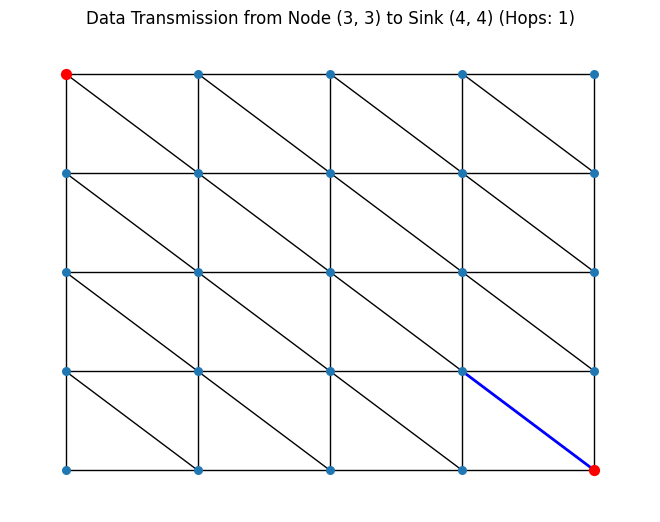

Data Transmission Path from Node (3, 3) to Sink (4, 4): [(3, 3), (4, 4)]
Total Hops: 1


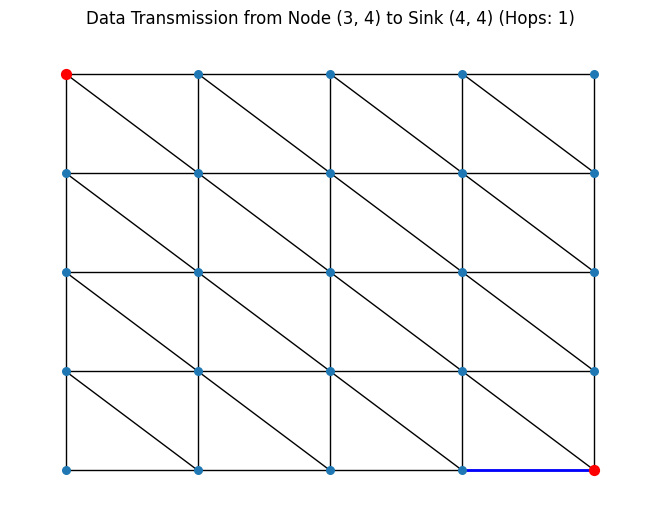

Data Transmission Path from Node (3, 4) to Sink (4, 4): [(3, 4), (4, 4)]
Total Hops: 1


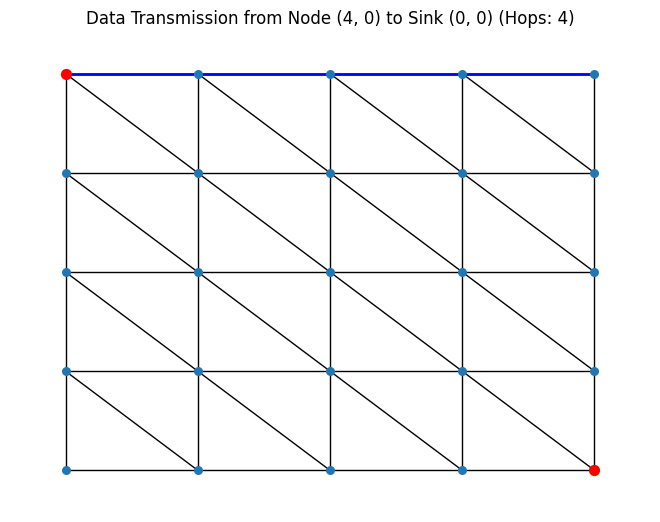

Data Transmission Path from Node (4, 0) to Sink (0, 0): [(4, 0), (3, 0), (2, 0), (1, 0), (0, 0)]
Total Hops: 4


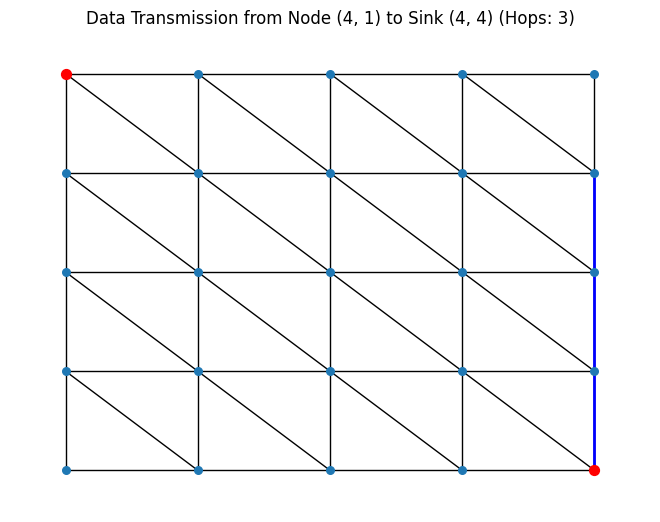

Data Transmission Path from Node (4, 1) to Sink (4, 4): [(4, 1), (4, 2), (4, 3), (4, 4)]
Total Hops: 3


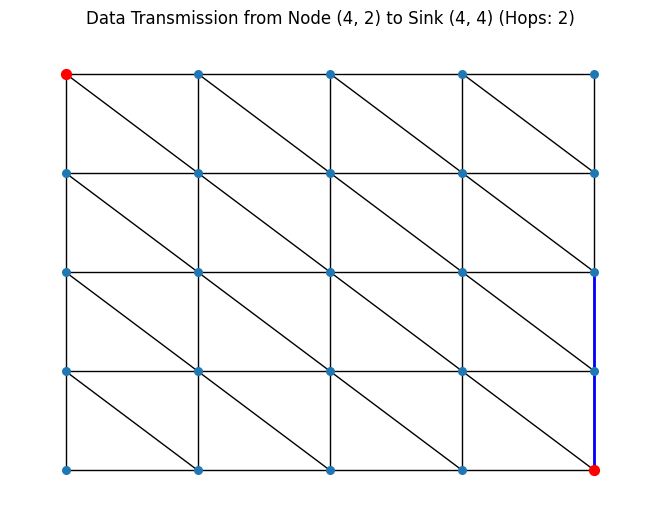

Data Transmission Path from Node (4, 2) to Sink (4, 4): [(4, 2), (4, 3), (4, 4)]
Total Hops: 2


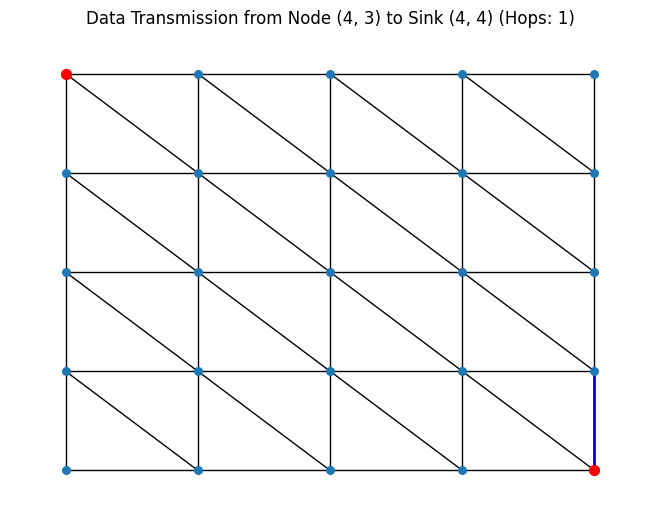

Data Transmission Path from Node (4, 3) to Sink (4, 4): [(4, 3), (4, 4)]
Total Hops: 1


In [5]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Create a grid-based graph with diagonal connections (adjust the grid size as needed)
G = nx.grid_2d_graph(5, 5)
G.add_edges_from(((n, (n[0] + 1, n[1] + 1)) for n in G.nodes if (n[0] + 1, n[1] + 1) in G.nodes))

# Define the sink node coordinates
sink_coordinates = [(0, 0), (4, 4)]  # Coordinates of two sink nodes
sink_ids = sink_coordinates

# Assign positions to nodes in the grid
pos = {(x, y): (x, -y) for x, y in G.nodes()}

# Select a random source node that is not a sink
available_nodes = list(G.nodes())
for sink_id in sink_ids:
    available_nodes.remove(sink_id)  # Ensure the source is not a sink

# Visualize paths from all possible source nodes to the nearest sink
for source_node in available_nodes:
    # Calculate the shortest path from the source node to all sinks
    shortest_paths = [nx.shortest_path(G, source=source_node, target=sink_id) for sink_id in sink_ids]

    # Find the sink with the shortest path
    nearest_sink_index = 0
    shortest_path_length = len(shortest_paths[0])
    for i in range(1, len(sink_ids)):
        path_length = len(shortest_paths[i])
        if path_length < shortest_path_length:
            nearest_sink_index = i
            shortest_path_length = path_length

    nearest_sink = sink_ids[nearest_sink_index]
    shortest_path = shortest_paths[nearest_sink_index]

    # Highlight the path from the source node to the nearest sink node
    path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]

    # Visualize the Sensor Network with the Sink Nodes and Data Transmission Path
    plt.figure()
    nx.draw(G, pos, node_size=30)
    nx.draw_networkx_nodes(G, pos, nodelist=sink_ids, node_color='red', node_size=50)  # Highlight the sink nodes
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=2)  # Highlight the data transmission path
    plt.title(f'Data Transmission from Node {source_node} to Sink {nearest_sink} (Hops: {len(shortest_path) - 1})')
    plt.show()

    # Print the path from the source node to the nearest sink node
    print(f"Data Transmission Path from Node {source_node} to Sink {nearest_sink}: {shortest_path}")
    print(f"Total Hops: {len(shortest_path) - 1}")


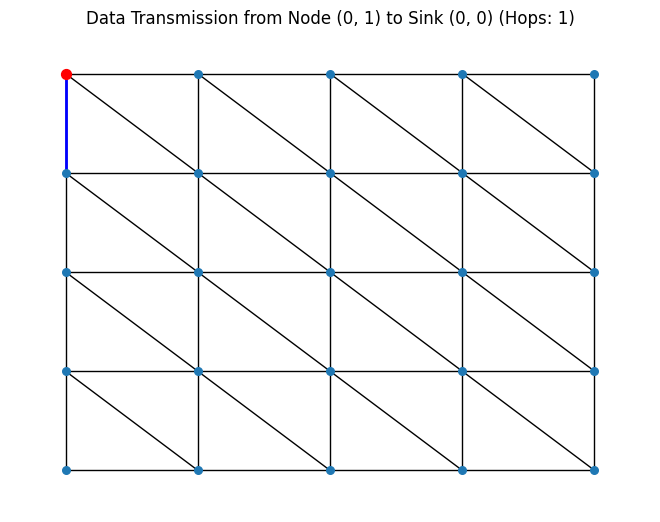

Data Transmission Path from Node (0, 1) to Sink (0, 0): [(0, 1), (0, 0)]
Total Hops: 1


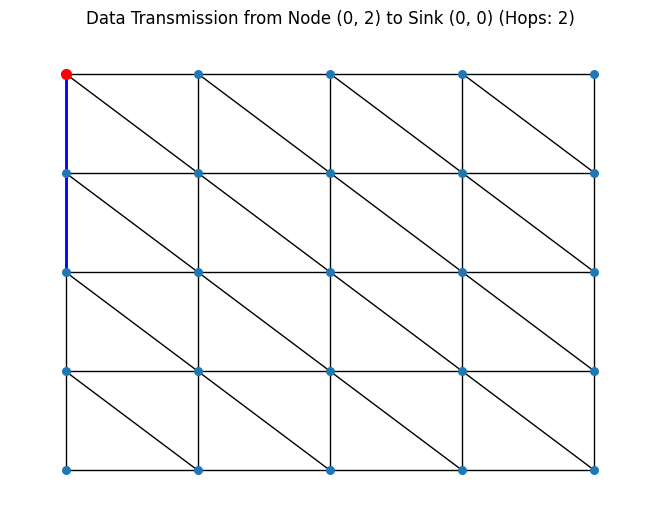

Data Transmission Path from Node (0, 2) to Sink (0, 0): [(0, 2), (0, 1), (0, 0)]
Total Hops: 2


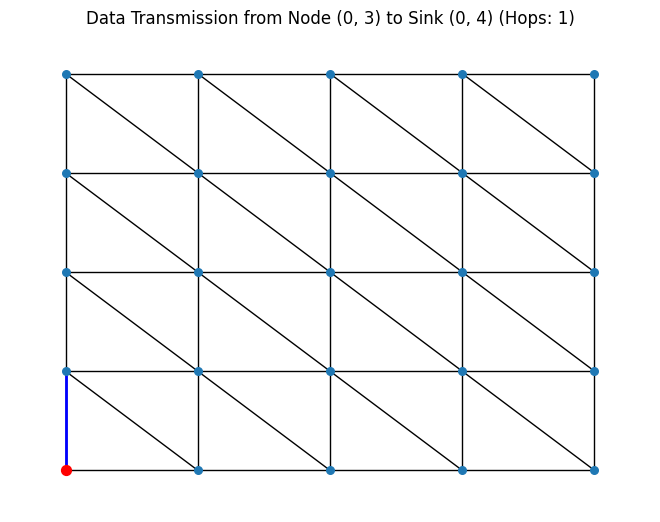

Data Transmission Path from Node (0, 3) to Sink (0, 4): [(0, 3), (0, 4)]
Total Hops: 1


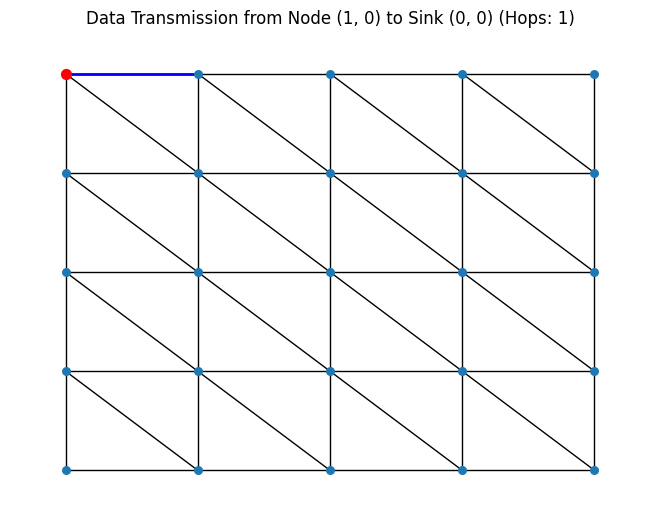

Data Transmission Path from Node (1, 0) to Sink (0, 0): [(1, 0), (0, 0)]
Total Hops: 1


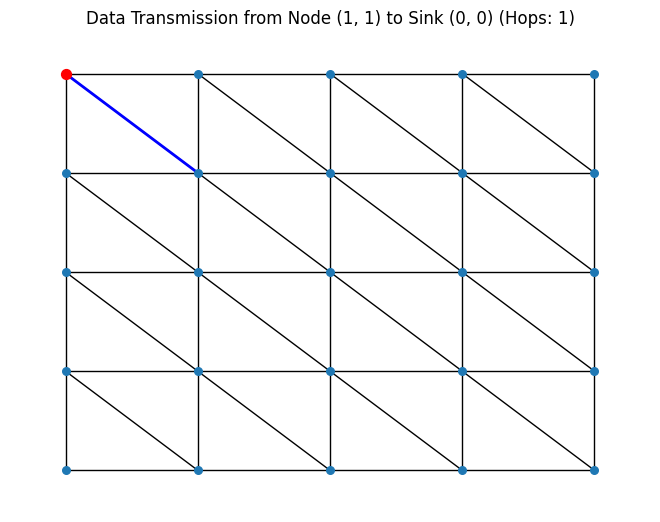

Data Transmission Path from Node (1, 1) to Sink (0, 0): [(1, 1), (0, 0)]
Total Hops: 1


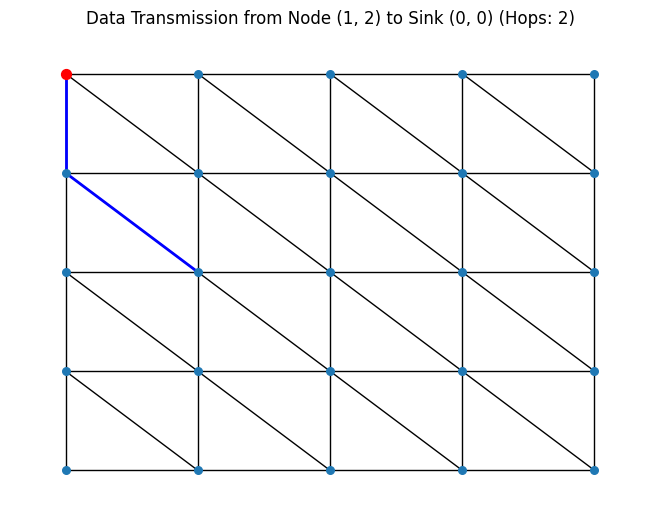

Data Transmission Path from Node (1, 2) to Sink (0, 0): [(1, 2), (0, 1), (0, 0)]
Total Hops: 2


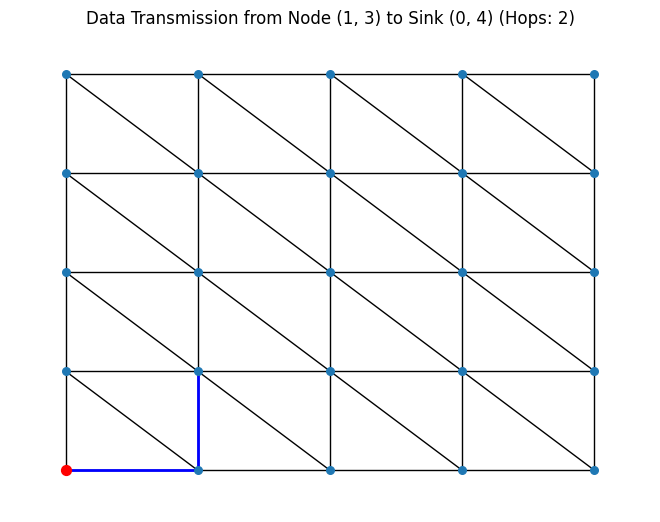

Data Transmission Path from Node (1, 3) to Sink (0, 4): [(1, 3), (1, 4), (0, 4)]
Total Hops: 2


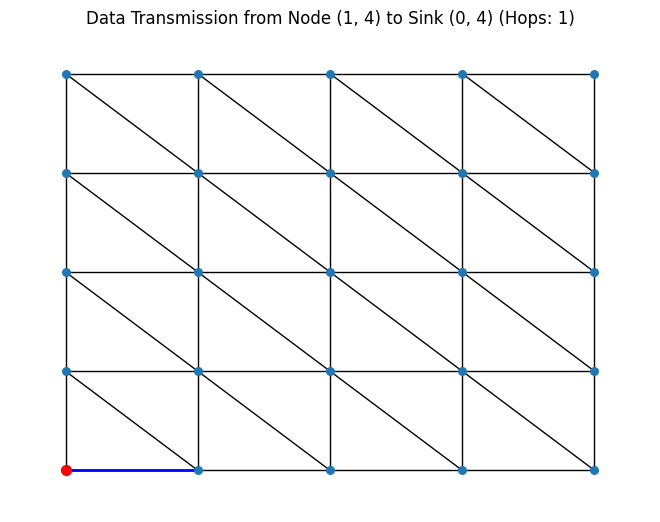

Data Transmission Path from Node (1, 4) to Sink (0, 4): [(1, 4), (0, 4)]
Total Hops: 1


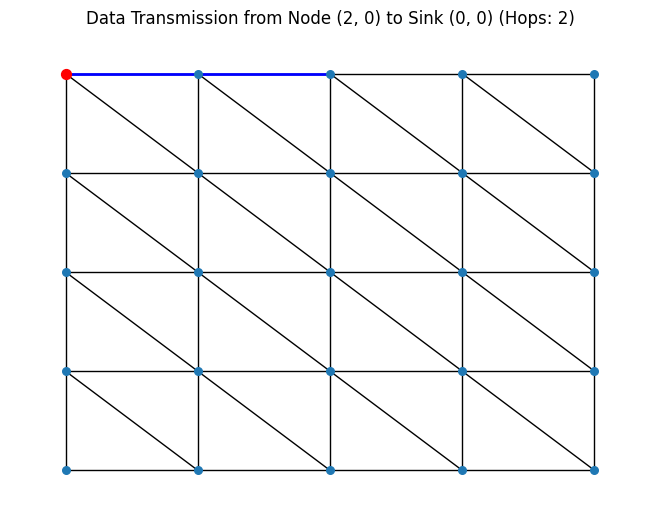

Data Transmission Path from Node (2, 0) to Sink (0, 0): [(2, 0), (1, 0), (0, 0)]
Total Hops: 2


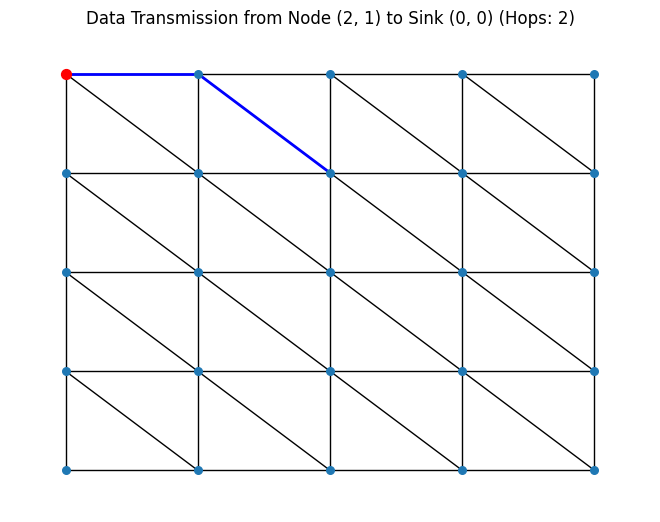

Data Transmission Path from Node (2, 1) to Sink (0, 0): [(2, 1), (1, 0), (0, 0)]
Total Hops: 2


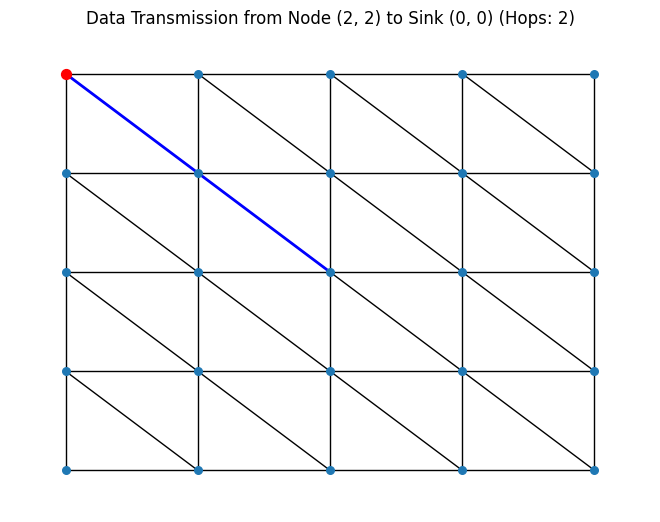

Data Transmission Path from Node (2, 2) to Sink (0, 0): [(2, 2), (1, 1), (0, 0)]
Total Hops: 2


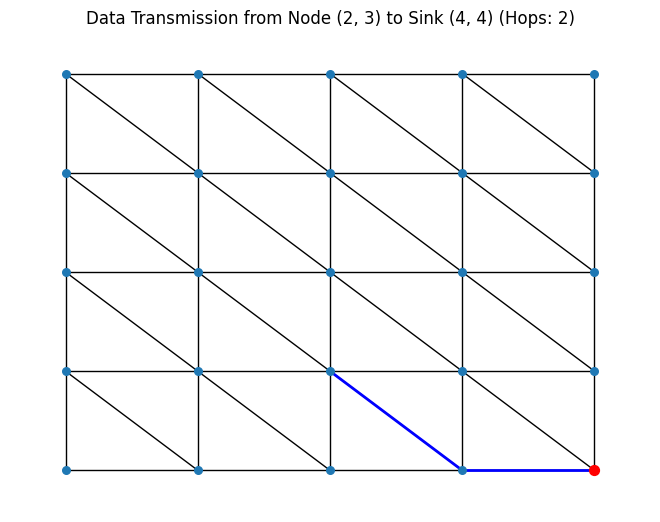

Data Transmission Path from Node (2, 3) to Sink (4, 4): [(2, 3), (3, 4), (4, 4)]
Total Hops: 2


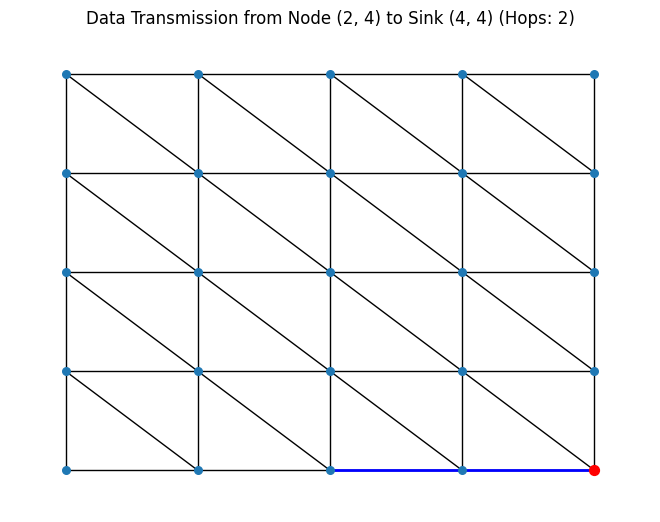

Data Transmission Path from Node (2, 4) to Sink (4, 4): [(2, 4), (3, 4), (4, 4)]
Total Hops: 2


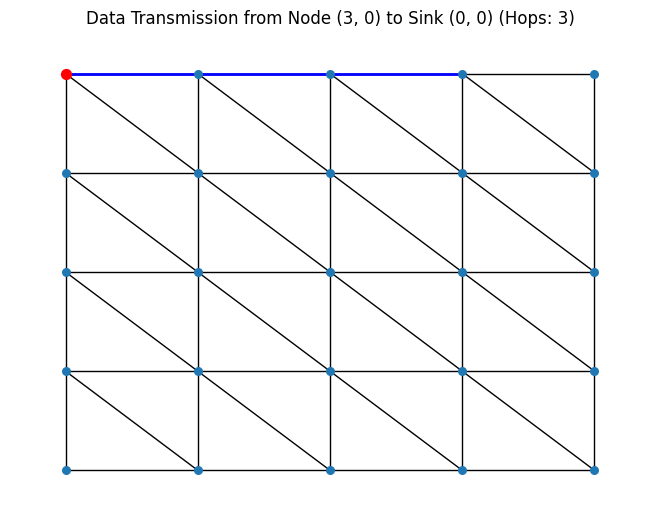

Data Transmission Path from Node (3, 0) to Sink (0, 0): [(3, 0), (2, 0), (1, 0), (0, 0)]
Total Hops: 3


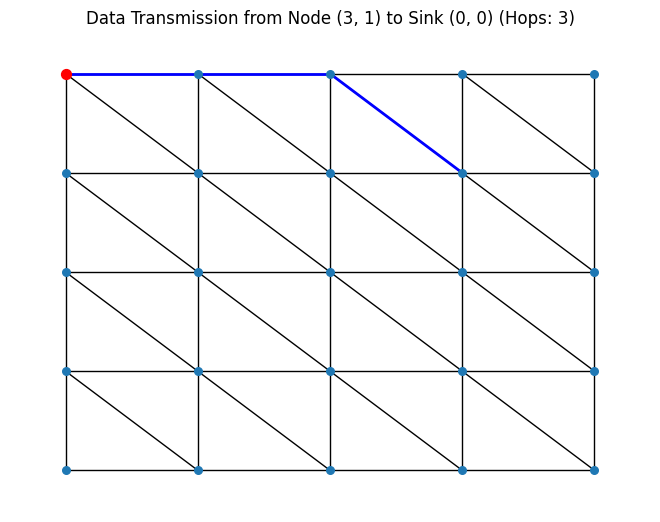

Data Transmission Path from Node (3, 1) to Sink (0, 0): [(3, 1), (2, 0), (1, 0), (0, 0)]
Total Hops: 3


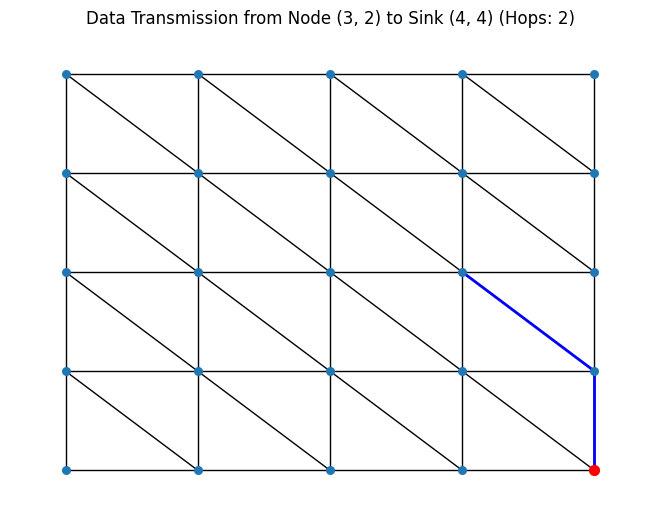

Data Transmission Path from Node (3, 2) to Sink (4, 4): [(3, 2), (4, 3), (4, 4)]
Total Hops: 2


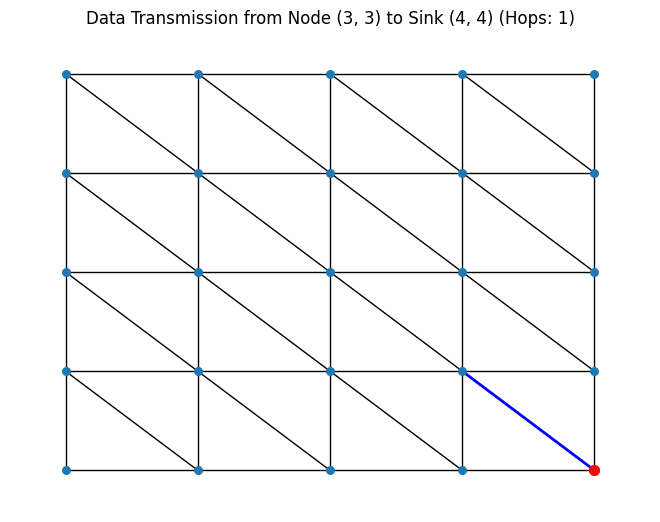

Data Transmission Path from Node (3, 3) to Sink (4, 4): [(3, 3), (4, 4)]
Total Hops: 1


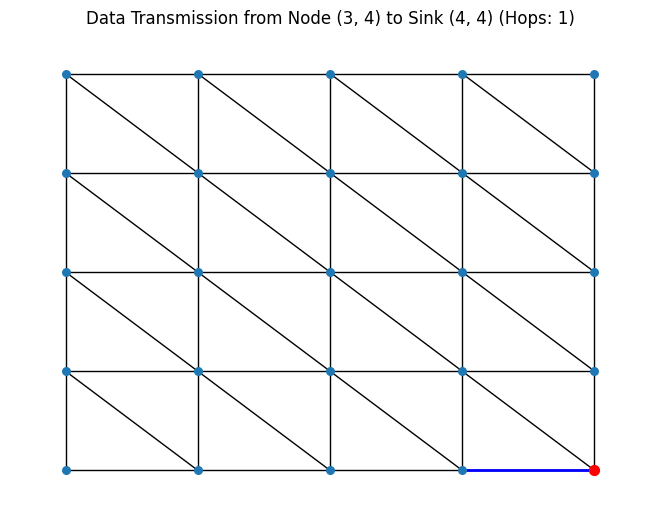

Data Transmission Path from Node (3, 4) to Sink (4, 4): [(3, 4), (4, 4)]
Total Hops: 1


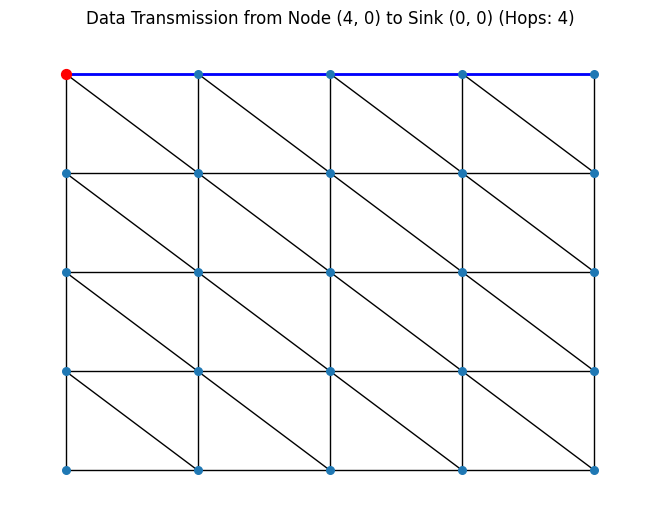

Data Transmission Path from Node (4, 0) to Sink (0, 0): [(4, 0), (3, 0), (2, 0), (1, 0), (0, 0)]
Total Hops: 4


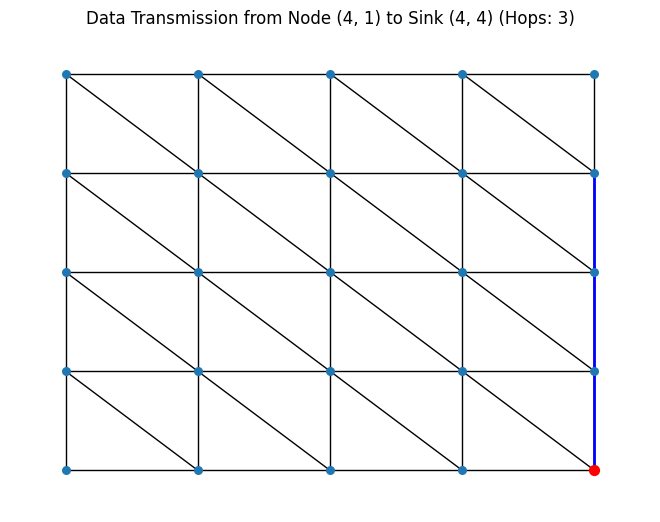

Data Transmission Path from Node (4, 1) to Sink (4, 4): [(4, 1), (4, 2), (4, 3), (4, 4)]
Total Hops: 3


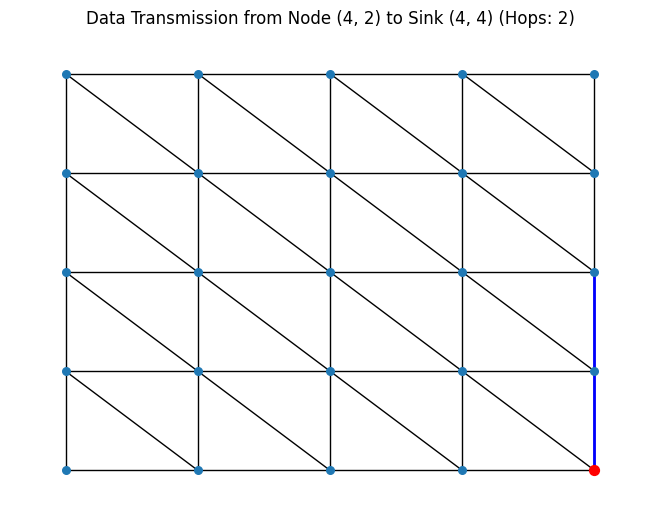

Data Transmission Path from Node (4, 2) to Sink (4, 4): [(4, 2), (4, 3), (4, 4)]
Total Hops: 2


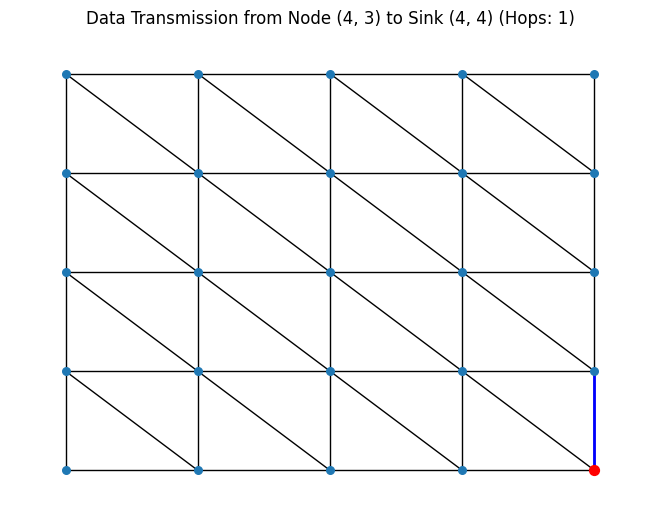

Data Transmission Path from Node (4, 3) to Sink (4, 4): [(4, 3), (4, 4)]
Total Hops: 1


In [6]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Create a grid-based graph with diagonal connections (adjust the grid size as needed)
G = nx.grid_2d_graph(5, 5)
G.add_edges_from(((n, (n[0] + 1, n[1] + 1)) for n in G.nodes if (n[0] + 1, n[1] + 1) in G.nodes))

# Define the sink node coordinates
sink_coordinates = [(0, 0), (4, 4), (0, 4)]  # Coordinates of three sink nodes
sink_ids = sink_coordinates

# Assign positions to nodes in the grid
pos = {(x, y): (x, -y) for x, y in G.nodes()}

# Select a random source node that is not a sink
available_nodes = list(G.nodes())
for sink_id in sink_ids:
    available_nodes.remove(sink_id)  # Ensure the source is not a sink

# Visualize paths from all possible source nodes to the nearest sink
for source_node in available_nodes:
    # Calculate the shortest path from the source node to all sinks
    shortest_paths = [nx.shortest_path(G, source=source_node, target=sink_id) for sink_id in sink_ids]

    # Find the sink with the shortest path
    nearest_sink_index = 0
    shortest_path_length = len(shortest_paths[0])
    for i in range(1, len(sink_ids)):
        path_length = len(shortest_paths[i])
        if path_length < shortest_path_length:
            nearest_sink_index = i
            shortest_path_length = path_length

    nearest_sink = sink_ids[nearest_sink_index]
    shortest_path = shortest_paths[nearest_sink_index]

    # Highlight the path from the source node to the nearest sink node
    path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]

    # Visualize the Sensor Network with the Sink Node and Data Transmission Path
    plt.figure()
    nx.draw(G, pos, node_size=30)
    nx.draw_networkx_nodes(G, pos, nodelist=[nearest_sink], node_color='red', node_size=50)  # Highlight the nearest sink node
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=2)  # Highlight the data transmission path
    plt.title(f'Data Transmission from Node {source_node} to Sink {nearest_sink} (Hops: {len(shortest_path) - 1})')
    plt.show()

    # Print the path from the source node to the nearest sink node
    print(f"Data Transmission Path from Node {source_node} to Sink {nearest_sink}: {shortest_path}")
    print(f"Total Hops: {len(shortest_path) - 1}")


In [7]:
# Assuming you have calculated shortest paths for 1, 2, and 3 sinks
shortest_paths_1_sink = [[(0, 1), (0, 0)],[(0, 2), (0, 1), (0, 0)],[(0, 3), (0, 2), (0, 1), (0, 0)],[(0, 4), (0, 3), (0, 2), (0, 1), (0, 0)],[(1, 0), (0, 0)],[(1, 1), (0, 0)],[(1, 2), (0, 1), (0, 0)],[(1, 3), (0, 2), (0, 1), (0, 0)],[(1, 4), (1, 3), (1, 2), (0, 1), (0, 0)],[(2, 0), (1, 0), (0, 0)],[(2, 1), (1, 0), (0, 0)],[(2, 2), (1, 1), (0, 0)],[(2, 3), (1, 2), (0, 1), (0, 0)],[(2, 4), (2, 3), (2, 2), (1, 1), (0, 0)],[(3, 0), (2, 0), (1, 0), (0, 0)],[(3, 1), (2, 0), (1, 0), (0, 0)],[(3, 2), (2, 1), (1, 0), (0, 0)],[(3, 3), (2, 2), (1, 1), (0, 0)], [(3, 4), (3, 3), (2, 2), (1, 1), (0, 0)],[(4, 0), (3, 0), (2, 0), (1, 0), (0, 0)],[(4, 1), (3, 1), (2, 1), (1, 0), (0, 0)],[(4, 2), (3, 2), (2, 2), (1, 1), (0, 0)], [(4, 3), (3, 3), (2, 2), (1, 1), (0, 0)],[(4, 4), (3, 3), (2, 2), (1, 1), (0, 0)]]  # List of shortest paths for 1 sink
shortest_paths_2_sinks =[[(0, 1), (0, 0)],[(0, 2), (0, 1), (0, 0)],[(0, 3), (0, 2), (0, 1), (0, 0)],[(0, 4), (0, 3), (0, 2), (0, 1), (0, 0)],[(1, 0), (0, 0)],[(1, 1), (0, 0)],[(1, 2), (0, 1), (0, 0)],[(1, 3), (0, 2), (0, 1), (0, 0)],[(1, 4), (2, 4), (3, 4), (4, 4)],[(2, 0), (1, 0), (0, 0)], [(2, 1), (1, 0), (0, 0)],[(2, 2), (1, 1), (0, 0)],[(2, 3), (3, 4), (4, 4)],[(2, 4), (3, 4), (4, 4)],[(3, 0), (2, 0), (1, 0), (0, 0)],[(3, 1), (2, 0), (1, 0), (0, 0)],[(3, 2), (4, 3), (4, 4)],[(3, 3), (4, 4)],[(3, 4), (4, 4)],[(4, 0), (3, 0), (2, 0), (1, 0), (0, 0)],[(4, 1), (4, 2), (4, 3), (4, 4)],[(4, 2), (4, 3), (4, 4)], [(4, 3), (4, 4)]]  # List of shortest paths for 2 sinks
shortest_paths_3_sinks =[[(0, 1), (0, 0)],[(0, 2), (0, 1), (0, 0)],[(0, 3), (0, 4)],[(1, 0), (0, 0)],[(1, 1), (0, 0)],[(1, 2), (0, 1), (0, 0)],[(1, 3), (1, 4), (0, 4)],[(1, 4), (0, 4)],[(2, 0), (1, 0), (0, 0)],[(2, 1), (1, 0), (0, 0)],[(2, 2), (1, 1), (0, 0)],[(2, 3), (3, 4), (4, 4)],[(4, 4)],[(2, 4), (3, 4), (4, 4)],[(3, 0), (2, 0), (1, 0), (0, 0)],[(3, 1), (2, 0), (1, 0), (0, 0)],[(3, 2), (4, 3), (4, 4)],[(3, 3), (4, 4)],[(3, 4), (4, 4)],[(4, 0), (3, 0), (2, 0), (1, 0), (0, 0)],[(4, 1), (4, 2), (4, 3), (4, 4)],[(4, 2), (4, 3), (4, 4)],[(4, 3), (4, 4)]]  # List of shortest paths for 3 sinks

# Calculate total hops for each sink scenario
total_hops_1_sink = sum(len(shortest_path) - 1 for shortest_path in shortest_paths_1_sink)
total_hops_2_sinks = sum(len(shortest_path) - 1 for shortest_path in shortest_paths_2_sinks)
total_hops_3_sinks = sum(len(shortest_path) - 1 for shortest_path in shortest_paths_3_sinks)

# Compare total hops
if total_hops_3_sinks < total_hops_1_sink and total_hops_3_sinks < total_hops_2_sinks:
    print("The routing with 3 sinks is the best.")
elif total_hops_2_sinks < total_hops_1_sink:
    print("The routing with 2 sinks is the best.")
else:
    print("The routing with 1 sink is the best.")


The routing with 3 sinks is the best.


In [8]:
# Energy parameters for the comparative analysis
initial_energy_sink1 = 1.0  # Initial energy of nodes for sink 1 (Joules)
initial_energy_sink2 = 1.0  # Initial energy of nodes for sink 2 (Joules)
initial_energy_sink3 = 1.0  # Initial energy of nodes for sink 3 (Joules)

packet_size = 4000  # Packet size (bits)
data_rate = 1.0  # Data rate (bits per second)

# Energy consumption model (energy per bit for transmission, reception, and idle)
transmission_energy_per_bit = 1e-6  # Example value (adjust as needed)
reception_energy_per_bit = 1e-6  # Example value (adjust as needed)
idle_energy_per_second = 1e-9  # Example value (adjust as needed)

# Calculate energy consumption per bit for transmission, reception, and idle
transmission_energy = packet_size * transmission_energy_per_bit
reception_energy = packet_size * reception_energy_per_bit

# Scenario 1: 1 sink
# Estimate network lifetime based on energy consumption
total_energy_consumption_1_sink = transmission_energy + reception_energy + idle_energy_per_second
network_lifetime_1_sink = initial_energy_sink1 / total_energy_consumption_1_sink

# Scenario 2: 2 sinks
# Estimate network lifetime based on energy consumption
total_energy_consumption_2_sinks = transmission_energy + reception_energy + idle_energy_per_second
network_lifetime_2_sinks = initial_energy_sink2 / total_energy_consumption_2_sinks

# Scenario 3: 3 sinks
# Estimate network lifetime based on energy consumption
total_energy_consumption_3_sinks = transmission_energy + reception_energy + idle_energy_per_second
network_lifetime_3_sinks = initial_energy_sink3 / total_energy_consumption_3_sinks

print("Comparative Analysis of Network Lifetime:")
print(f"Scenario 1 (1 Sink): {network_lifetime_1_sink} seconds")
print(f"Scenario 2 (2 Sinks): {network_lifetime_2_sinks} seconds")
print(f"Scenario 3 (3 Sinks): {network_lifetime_3_sinks} seconds")


Comparative Analysis of Network Lifetime:
Scenario 1 (1 Sink): 124.99998437500196 seconds
Scenario 2 (2 Sinks): 124.99998437500196 seconds
Scenario 3 (3 Sinks): 124.99998437500196 seconds


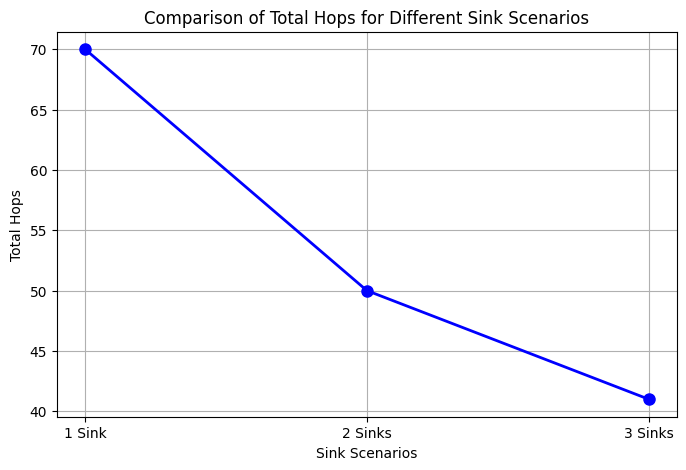

In [9]:
import matplotlib.pyplot as plt

# Scenario labels
scenarios = ['1 Sink', '2 Sinks', '3 Sinks']

# Total hops
total_hops = [total_hops_1_sink, total_hops_2_sinks, total_hops_3_sinks]

# Plotting the line chart
plt.figure(figsize=(8, 5))
plt.plot(scenarios, total_hops, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Sink Scenarios')
plt.ylabel('Total Hops')
plt.title('Comparison of Total Hops for Different Sink Scenarios')
plt.grid(True)
plt.show()


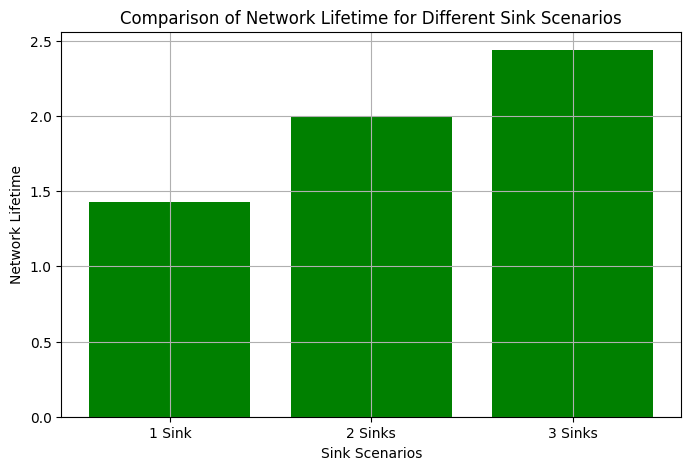

Network Lifetime for 1 Sink: 1.43 units of time
Network Lifetime for 2 Sinks: 2.00 units of time
Network Lifetime for 3 Sinks: 2.44 units of time


In [10]:
# Energy parameters
energy_per_hop = 1  # Adjust as needed
total_energy = 100  # Adjust as needed

# Calculate total energy consumption for each sink scenario
total_energy_consumption_1_sink = total_hops_1_sink * energy_per_hop
total_energy_consumption_2_sinks = total_hops_2_sinks * energy_per_hop
total_energy_consumption_3_sinks = total_hops_3_sinks * energy_per_hop

# Calculate network lifetime for each sink scenario
network_lifetime_1_sink = total_energy / total_energy_consumption_1_sink
network_lifetime_2_sinks = total_energy / total_energy_consumption_2_sinks
network_lifetime_3_sinks = total_energy / total_energy_consumption_3_sinks

# Comparative analysis plot
plt.figure(figsize=(8, 5))
plt.bar(scenarios, [network_lifetime_1_sink, network_lifetime_2_sinks, network_lifetime_3_sinks], color='green')
plt.xlabel('Sink Scenarios')
plt.ylabel('Network Lifetime')
plt.title('Comparison of Network Lifetime for Different Sink Scenarios')
plt.grid(True)
plt.show()

# Print network lifetime results
print(f"Network Lifetime for 1 Sink: {network_lifetime_1_sink:.2f} units of time")
print(f"Network Lifetime for 2 Sinks: {network_lifetime_2_sinks:.2f} units of time")
print(f"Network Lifetime for 3 Sinks: {network_lifetime_3_sinks:.2f} units of time")


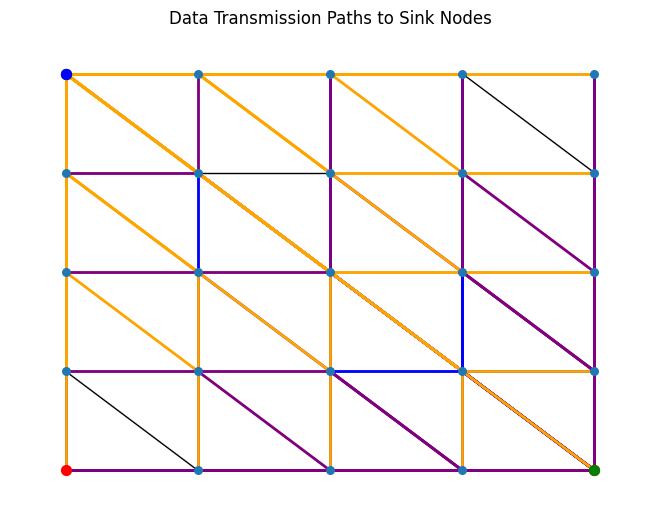

Estimated Lifetime in Rounds (3 Sinks): 114529.69525938683
Estimated Lifetime in Rounds (2 Sinks): 93914.3501126972
Estimated Lifetime in Rounds (1 Sink): 67081.67865192657


In [6]:
import random
import networkx as nx
import matplotlib.pyplot as plt

def calculate_lifetime(G, sink_ids):
    total_hops = 0
    total_energy = len(G.nodes)  # Initial energy of nodes is 1 J

    # Visualize paths from all possible source nodes to the nearest sink
    for source_node in G.nodes:
        # Calculate the shortest path from the source node to all sinks
        shortest_paths = [nx.shortest_path(G, source=source_node, target=sink_id) for sink_id in sink_ids]

        # Find the sink with the shortest path
        nearest_sink_index = 0
        shortest_path_length = len(shortest_paths[0])
        for i in range(1, len(sink_ids)):
            path_length = len(shortest_paths[i])
            if path_length < shortest_path_length:
                nearest_sink_index = i
                shortest_path_length = path_length

        nearest_sink = sink_ids[nearest_sink_index]
        shortest_path = shortest_paths[nearest_sink_index]

        # Update total hops
        total_hops += len(shortest_path) - 1

    # Estimate the lifetime in rounds
    packet_size = 4000  # bits
    path_loss_exponent = 3
    node_density = 0.0011
    transmission_energy = packet_size * total_hops * (node_density ** path_loss_exponent)

    # Calculate the number of rounds until energy depletion
    num_rounds = total_energy / transmission_energy

    return num_rounds, total_hops

# Create a grid-based graph with diagonal connections (adjust the grid size as needed)
G = nx.grid_2d_graph(5, 5)
G.add_edges_from(((n, (n[0] + 1, n[1] + 1)) for n in G.nodes if (n[0] + 1, n[1] + 1) in G.nodes))

# Define the sink node coordinates
sink_coordinates_3_sinks = [(0, 0), (4, 4), (0, 4)]  # Coordinates of three sink nodes
sink_coordinates_2_sinks = [(0, 0), (4, 4)]  # Coordinates of two sink nodes
sink_coordinates_1_sink = [(0, 0)]  # Coordinates of one sink node

# Calculate lifetime for 3 sinks
num_rounds_3_sinks, total_hops_3_sinks = calculate_lifetime(G, sink_coordinates_3_sinks)

# Calculate lifetime for 2 sinks
num_rounds_2_sinks, total_hops_2_sinks = calculate_lifetime(G, sink_coordinates_2_sinks)

# Calculate lifetime for 1 sink
num_rounds_1_sink, total_hops_1_sink = calculate_lifetime(G, sink_coordinates_1_sink)

# Visualize the Sensor Network with the Sink Nodes and Data Transmission Paths
plt.figure()
pos = {(x, y): (x, -y) for x, y in G.nodes()}
nx.draw(G, pos, node_size=30)

# Plot for 3 sinks
for nearest_sink in sink_coordinates_3_sinks:
    nx.draw_networkx_nodes(G, pos, nodelist=[nearest_sink], node_color='red', node_size=50)
for source_node in G.nodes:
    shortest_path = nx.shortest_path(G, source=source_node, target=nearest_sink)
    path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=2)

# Plot for 2 sinks
for nearest_sink in sink_coordinates_2_sinks:
    nx.draw_networkx_nodes(G, pos, nodelist=[nearest_sink], node_color='green', node_size=50)
for source_node in G.nodes:
    shortest_path = nx.shortest_path(G, source=source_node, target=nearest_sink)
    path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='purple', width=2)

# Plot for 1 sink
for nearest_sink in sink_coordinates_1_sink:
    nx.draw_networkx_nodes(G, pos, nodelist=[nearest_sink], node_color='blue', node_size=50)
for source_node in G.nodes:
    shortest_path = nx.shortest_path(G, source=source_node, target=nearest_sink)
    path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='orange', width=2)

plt.title(f'Data Transmission Paths to Sink Nodes')
plt.show()

# Display calculated lifetime for each scenario
print("Estimated Lifetime in Rounds (3 Sinks):", num_rounds_3_sinks)
print("Estimated Lifetime in Rounds (2 Sinks):", num_rounds_2_sinks)
print("Estimated Lifetime in Rounds (1 Sink):", num_rounds_1_sink)


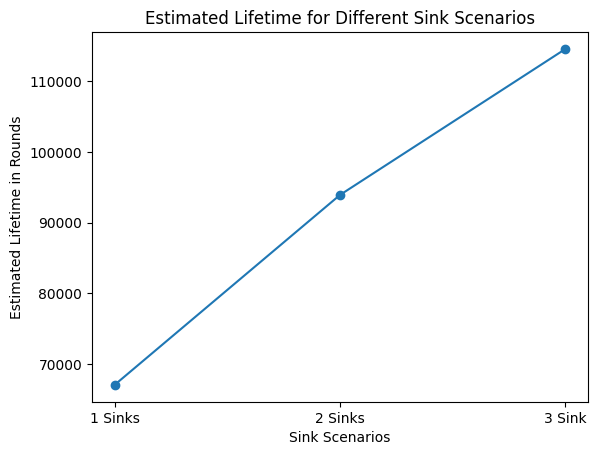

In [9]:
scenarios = ['1 Sinks', '2 Sinks', '3 Sink']
lifetime_data = [num_rounds_1_sink, num_rounds_2_sinks, num_rounds_3_sinks]

plt.plot(scenarios, lifetime_data, marker='o')
plt.xlabel('Sink Scenarios')
plt.ylabel('Estimated Lifetime in Rounds')
plt.title('Estimated Lifetime for Different Sink Scenarios')
plt.show()

Data Transmission Path from Node (0, 1) to Sink (0, 0): [(0, 1), (0, 0)]
Total Hops: 1
Data Transmission Path from Node (0, 2) to Sink (0, 0): [(0, 2), (0, 1), (0, 0)]
Total Hops: 2
Data Transmission Path from Node (0, 3) to Sink (0, 4): [(0, 3), (0, 4)]
Total Hops: 1
Data Transmission Path from Node (1, 0) to Sink (0, 0): [(1, 0), (0, 0)]
Total Hops: 1
Data Transmission Path from Node (1, 1) to Sink (0, 0): [(1, 1), (0, 0)]
Total Hops: 1
Data Transmission Path from Node (1, 2) to Sink (0, 0): [(1, 2), (0, 1), (0, 0)]
Total Hops: 2
Data Transmission Path from Node (1, 3) to Sink (0, 4): [(1, 3), (1, 4), (0, 4)]
Total Hops: 2
Data Transmission Path from Node (1, 4) to Sink (0, 4): [(1, 4), (0, 4)]
Total Hops: 1
Data Transmission Path from Node (2, 0) to Sink (0, 0): [(2, 0), (1, 0), (0, 0)]
Total Hops: 2
Data Transmission Path from Node (2, 1) to Sink (0, 0): [(2, 1), (1, 0), (0, 0)]
Total Hops: 2
Data Transmission Path from Node (2, 2) to Sink (0, 0): [(2, 2), (1, 1), (0, 0)]
Total Hop

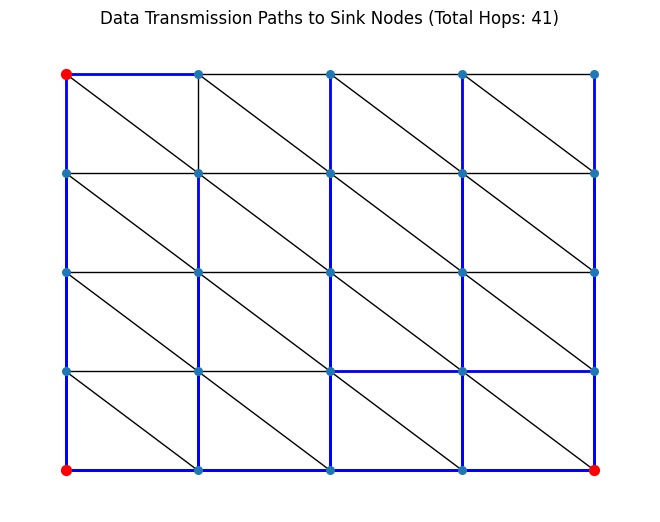

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Create a grid-based graph with diagonal connections (adjust the grid size as needed)
G = nx.grid_2d_graph(5, 5)
G.add_edges_from(((n, (n[0] + 1, n[1] + 1)) for n in G.nodes if (n[0] + 1, n[1] + 1) in G.nodes))

# Define the sink node coordinates
sink_coordinates = [(0, 0), (4, 4), (0, 4)]  # Coordinates of three sink nodes
sink_ids = sink_coordinates

# Assign positions to nodes in the grid
pos = {(x, y): (x, -y) for x, y in G.nodes()}

# Select a random source node that is not a sink
available_nodes = list(G.nodes())
for sink_id in sink_ids:
    available_nodes.remove(sink_id)  # Ensure the source is not a sink

# Variables for estimating lifetime
total_hops = 0
total_energy = len(available_nodes)  # Initial energy of nodes is 1 J

# Visualize paths from all possible source nodes to the nearest sink
for source_node in available_nodes:
    # Calculate the shortest path from the source node to all sinks
    shortest_paths = [nx.shortest_path(G, source=source_node, target=sink_id) for sink_id in sink_ids]

    # Find the sink with the shortest path
    nearest_sink_index = 0
    shortest_path_length = len(shortest_paths[0])
    for i in range(1, len(sink_ids)):
        path_length = len(shortest_paths[i])
        if path_length < shortest_path_length:
            nearest_sink_index = i
            shortest_path_length = path_length

    nearest_sink = sink_ids[nearest_sink_index]
    shortest_path = shortest_paths[nearest_sink_index]

    # Update total hops
    total_hops += len(shortest_path) - 1

    # Print the path from the source node to the nearest sink node
    print(f"Data Transmission Path from Node {source_node} to Sink {nearest_sink}: {shortest_path}")
    print(f"Total Hops: {len(shortest_path) - 1}")

# Estimate the lifetime in rounds
packet_size = 4000  # bits
path_loss_exponent = 3
node_density = 0.0011
transmission_energy = packet_size * total_hops * (node_density ** path_loss_exponent)

# Calculate the number of rounds until energy depletion
num_rounds = total_energy / transmission_energy

print(f"Estimated Lifetime in Rounds: {num_rounds}")

# Visualize the Sensor Network with the Sink Nodes and Data Transmission Paths
plt.figure()
nx.draw(G, pos, node_size=30)
for nearest_sink in sink_ids:
    nx.draw_networkx_nodes(G, pos, nodelist=[nearest_sink], node_color='red', node_size=50)  # Highlight the nearest sink nodes
for source_node in available_nodes:
    shortest_path = nx.shortest_path(G, source=source_node, target=nearest_sink)
    path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=2)  # Highlight the data transmission paths
plt.title(f'Data Transmission Paths to Sink Nodes (Total Hops: {total_hops})')
plt.show()
